In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# graph-ufs predictions
ds_pred = xr.open_zarr("zarr-stores/graphufs_predictions.zarr/")
ds_pred.load()

<xarray.Dataset> Size: 642MB
Dimensions:     (optim_step: 8, time: 1, batch: 16, lat: 192, lon: 384,
                 level: 3, z_l: 3)
Coordinates:
  * batch       (batch) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * lat         (lat) float64 2kB 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * level       (level) float32 12B 97.82 505.7 998.8
  * lon         (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * optim_step  (optim_step) int64 64B 0 1 2 3 4 5 6 7
  * time        (time) timedelta64[ns] 8B 06:00:00
  * z_l         (z_l) float64 24B 0.5154 47.36 200.3
Data variables:
    SSH         (optim_step, time, batch, lat, lon) float32 38MB -0.791 ... nan
    icec        (optim_step, time, batch, lat, lon) float32 38MB 0.9982 ... nan
    icetk       (optim_step, time, batch, lat, lon) float32 38MB 2.399 ... nan
    land        (optim_step, time, batch, lat, lon) float32 38MB 2.008 ... nan
    pressfc     (optim_step, time, batch, lat, lon) float32 38MB 1.03e+05 ......
    so          (optim_step, time, batch, z_l, lat, lon) float32 113MB 32.08 ...
    soilm       (optim_step, time, batch, lat, lon) float32 38MB -0.3434 ... nan
    temp        (optim_step, time, batch, z_l, lat, lon) float32 113MB -1.749...
    tmp         (optim_step, time, batch, level, lat, lon) float32 113MB 199....
    ugrd10m     (optim_step, time, batch, lat, lon) float32 38MB 0.2257 ... nan
    vgrd10m     (optim_step, time, batch, lat, lon) float32 38MB -6.072 ... nan

In [3]:
# targets
ds_tar = xr.open_zarr("zarr-stores/graphufs_targets.zarr/")
ds_tar.load()

<xarray.Dataset> Size: 642MB
Dimensions:     (optim_step: 8, batch: 16, time: 1, lat: 192, lon: 384,
                 level: 3, z_l: 3)
Coordinates:
  * batch       (batch) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * lat         (lat) float64 2kB 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * level       (level) float32 12B 97.82 505.7 998.8
  * lon         (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * optim_step  (optim_step) int64 64B 0 1 2 3 4 5 6 7
  * time        (time) timedelta64[ns] 8B 06:00:00
  * z_l         (z_l) float64 24B 0.5154 47.36 200.3
Data variables:
    SSH         (optim_step, batch, time, lat, lon) float32 38MB -0.8005 ... nan
    icec        (optim_step, batch, time, lat, lon) float32 38MB 0.9994 ... nan
    icetk       (optim_step, batch, time, lat, lon) float32 38MB 2.397 ... nan
    land        (optim_step, batch, time, lat, lon) float32 38MB 2.0 2.0 ... nan
    pressfc     (optim_step, batch, time, lat, lon) float32 38MB 1.03e+05 ......
    so          (optim_step, batch, time, z_l, lat, lon) float32 113MB 32.03 ...
    soilm       (optim_step, batch, time, lat, lon) float32 38MB 0.0 0.0 ... nan
    temp        (optim_step, batch, time, z_l, lat, lon) float32 113MB -1.744...
    tmp         (optim_step, batch, time, level, lat, lon) float32 113MB 199....
    ugrd10m     (optim_step, batch, time, lat, lon) float32 38MB 1.18 ... nan
    vgrd10m     (optim_step, batch, time, lat, lon) float32 38MB -5.789 ... nan
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [4]:
# inputs
ds_inp = xr.open_zarr("zarr-stores/graphufs_inputs.zarr/")
ds_inp.load()

<xarray.Dataset> Size: 1GB
Dimensions:            (optim_step: 8, batch: 16, time: 2, lat: 192, lon: 384,
                        z_l: 3, level: 3)
Coordinates:
  * batch              (batch) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * lat                (lat) float64 2kB 89.28 88.36 87.42 ... -88.36 -89.28
  * level              (level) float32 12B 97.82 505.7 998.8
  * lon                (lon) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * optim_step         (optim_step) int64 64B 0 1 2 3 4 5 6 7
  * time               (time) timedelta64[ns] 16B -1 days +18:00:00 00:00:00
  * z_l                (z_l) float64 24B 0.5154 47.36 200.3
Data variables: (12/16)
    SSH                (optim_step, batch, time, lat, lon) float32 75MB -0.78...
    day_progress_cos   (optim_step, batch, time, lon) float32 393kB -4.371e-0...
    day_progress_sin   (optim_step, batch, time, lon) float32 393kB 1.0 ... nan
    icec               (optim_step, batch, time, lat, lon) float32 75MB 0.999...
    icetk              (optim_step, batch, time, lat, lon) float32 75MB 2.416...
    land               (optim_step, batch, time, lat, lon) float32 75MB 2.0 ....
    ...                 ...
    temp               (optim_step, batch, time, z_l, lat, lon) float32 226MB ...
    tmp                (optim_step, batch, time, level, lat, lon) float32 226MB ...
    ugrd10m            (optim_step, batch, time, lat, lon) float32 75MB -0.40...
    vgrd10m            (optim_step, batch, time, lat, lon) float32 75MB -5.29...
    year_progress_cos  (optim_step, batch, time) float32 1kB 1.0 1.0 ... nan nan
    year_progress_sin  (optim_step, batch, time) float32 1kB 0.003359 ... nan
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

### SSH

/tmp/ipykernel_2671923/368164965.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for bnum in range(ds_pred.dims['batch']):


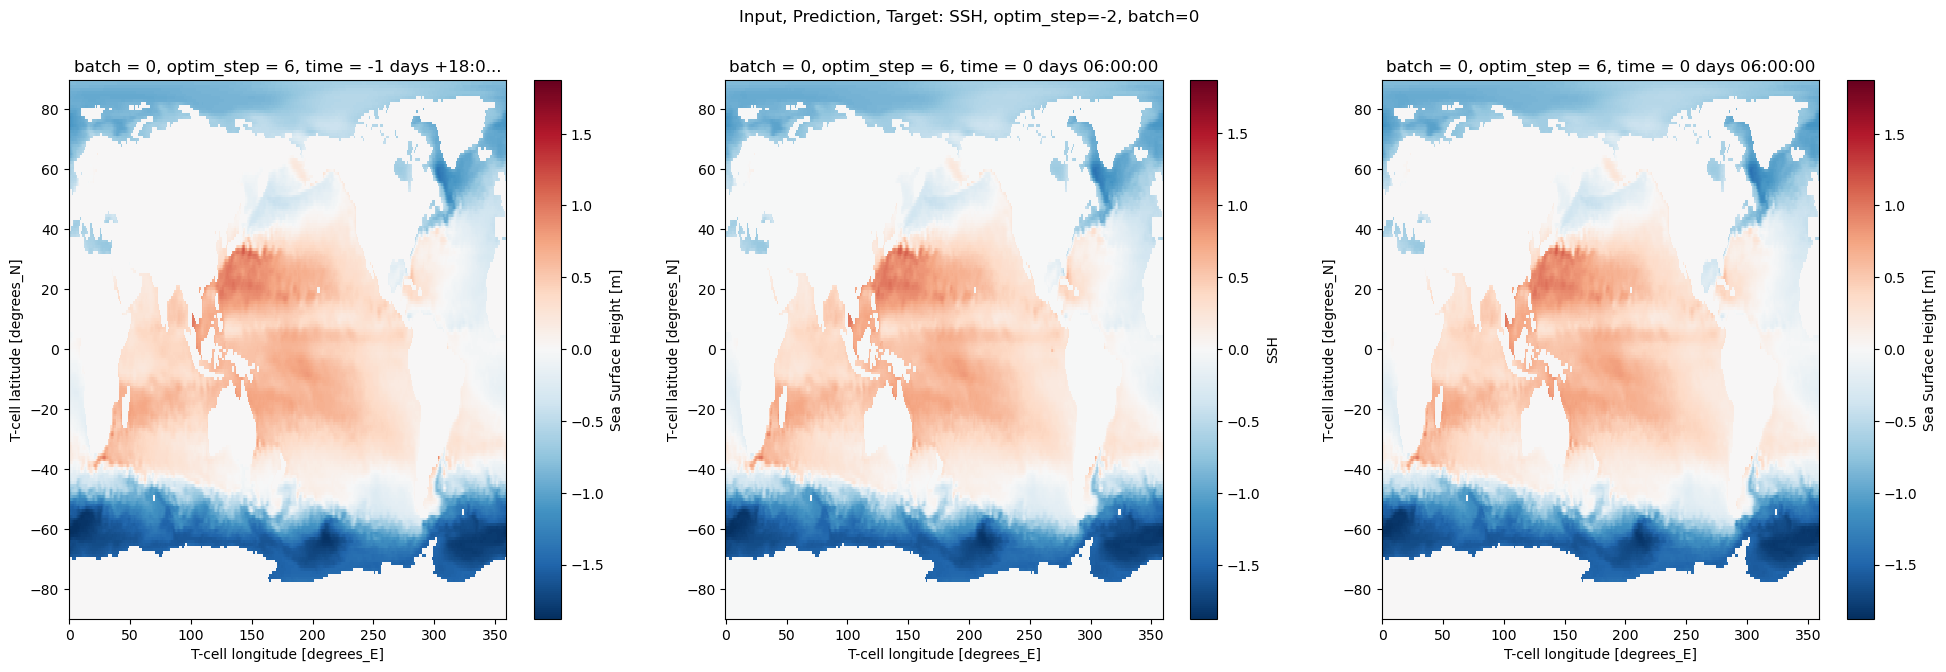

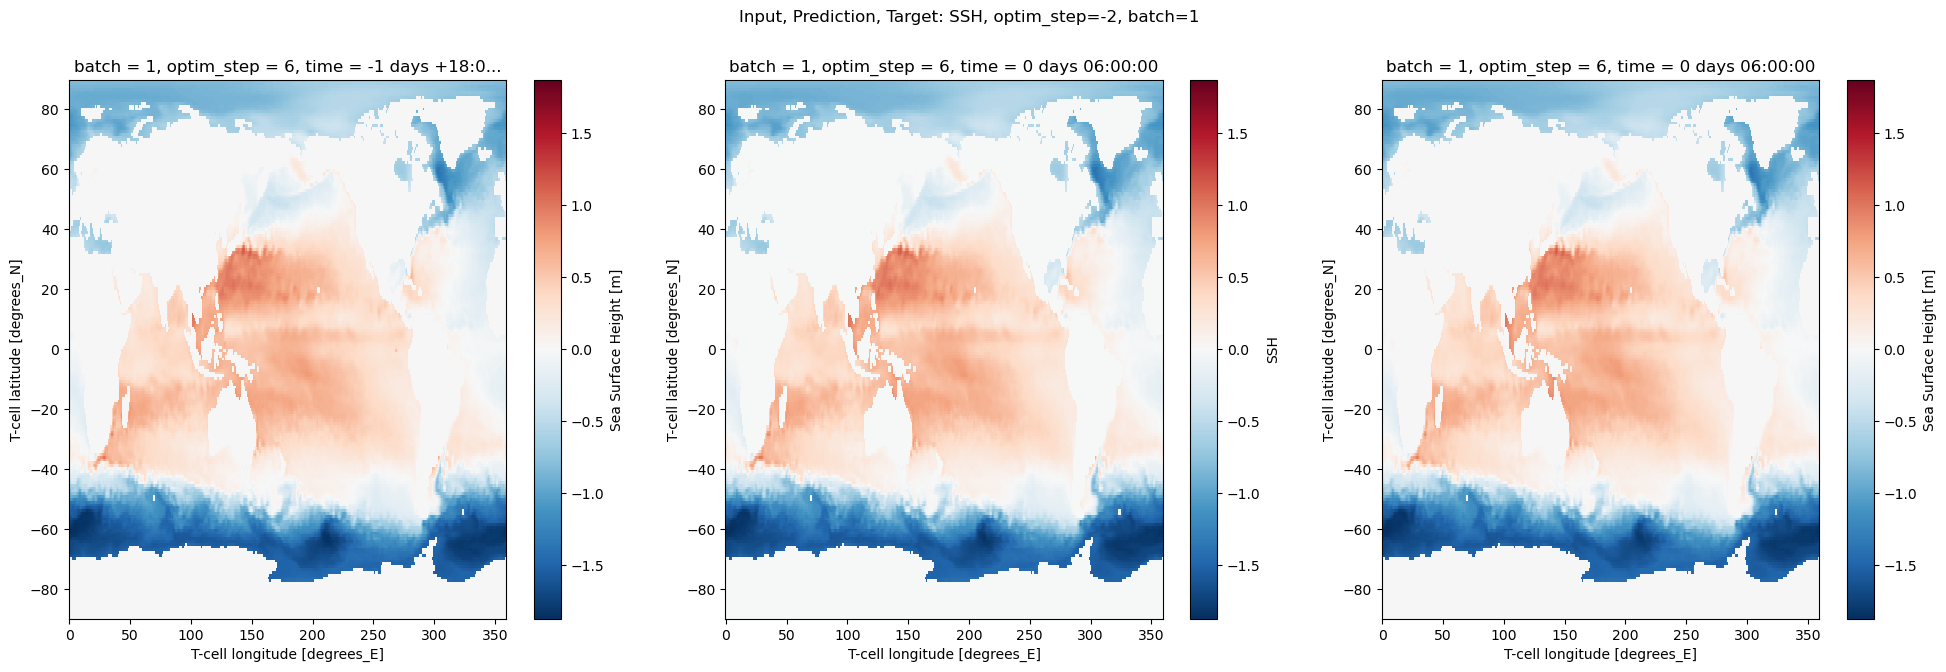

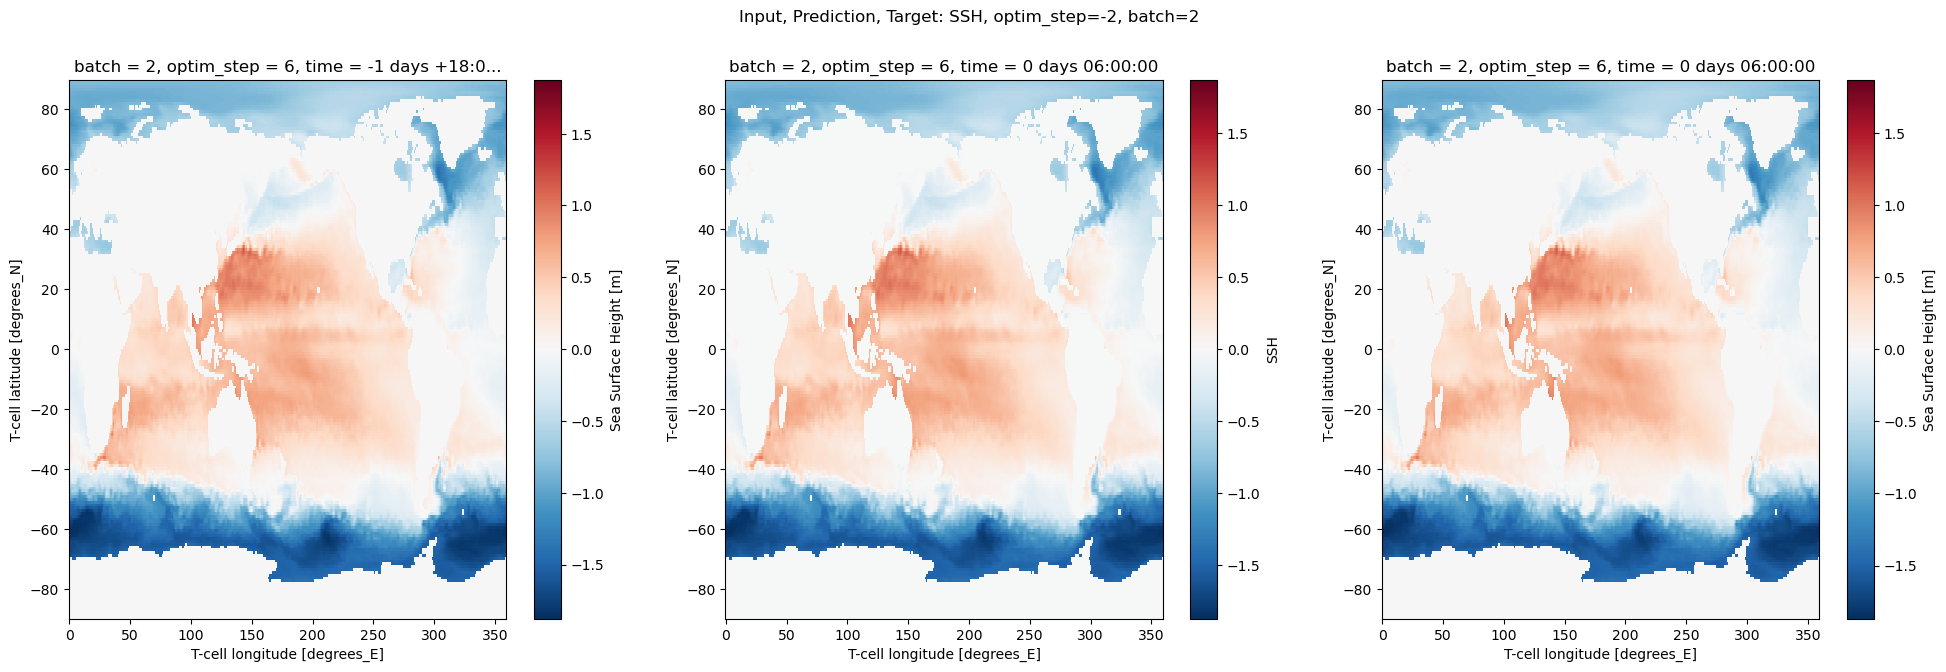

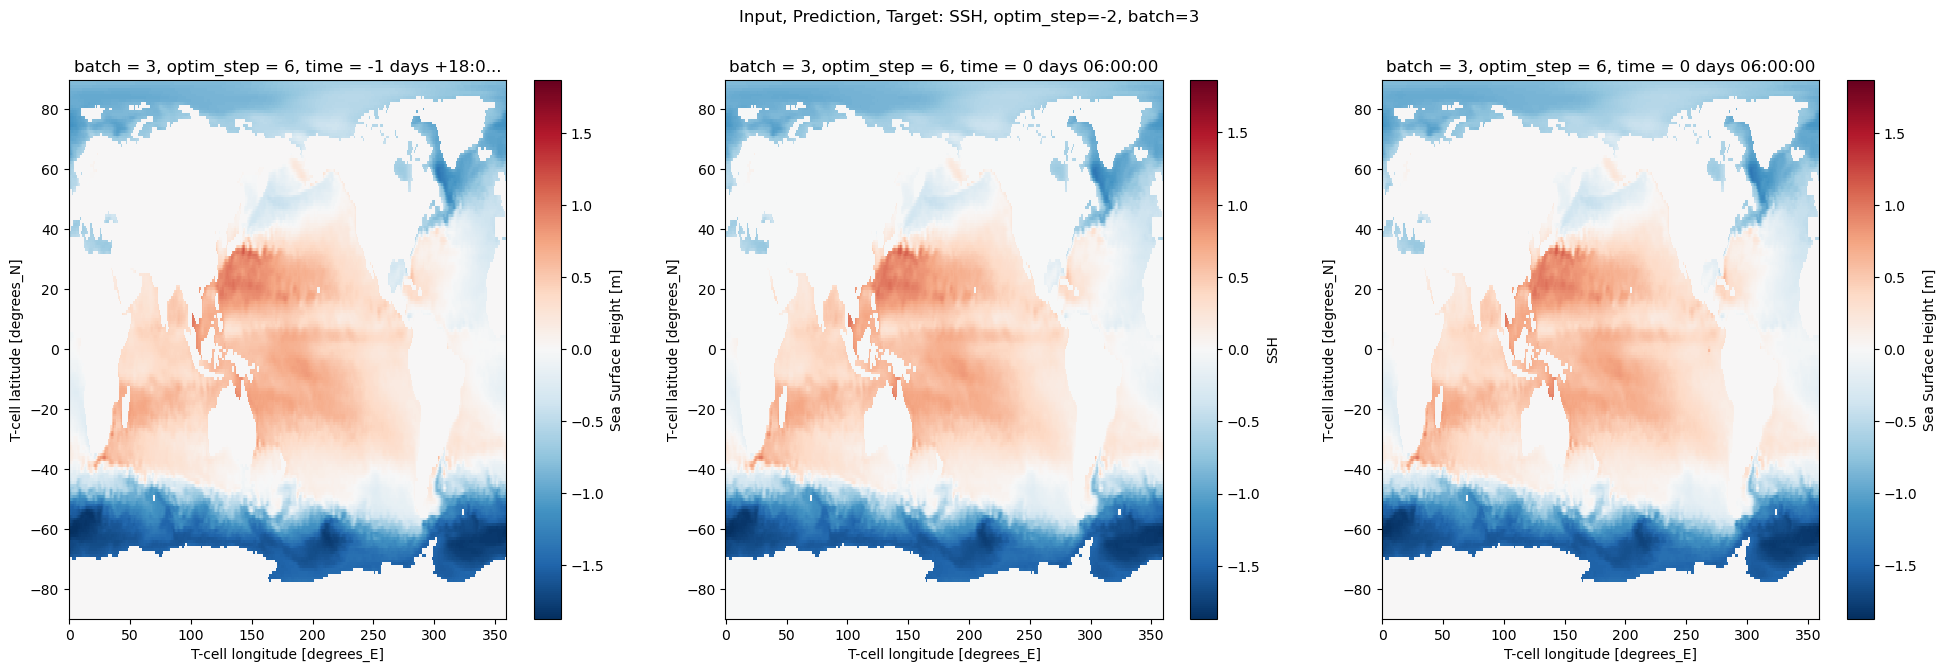

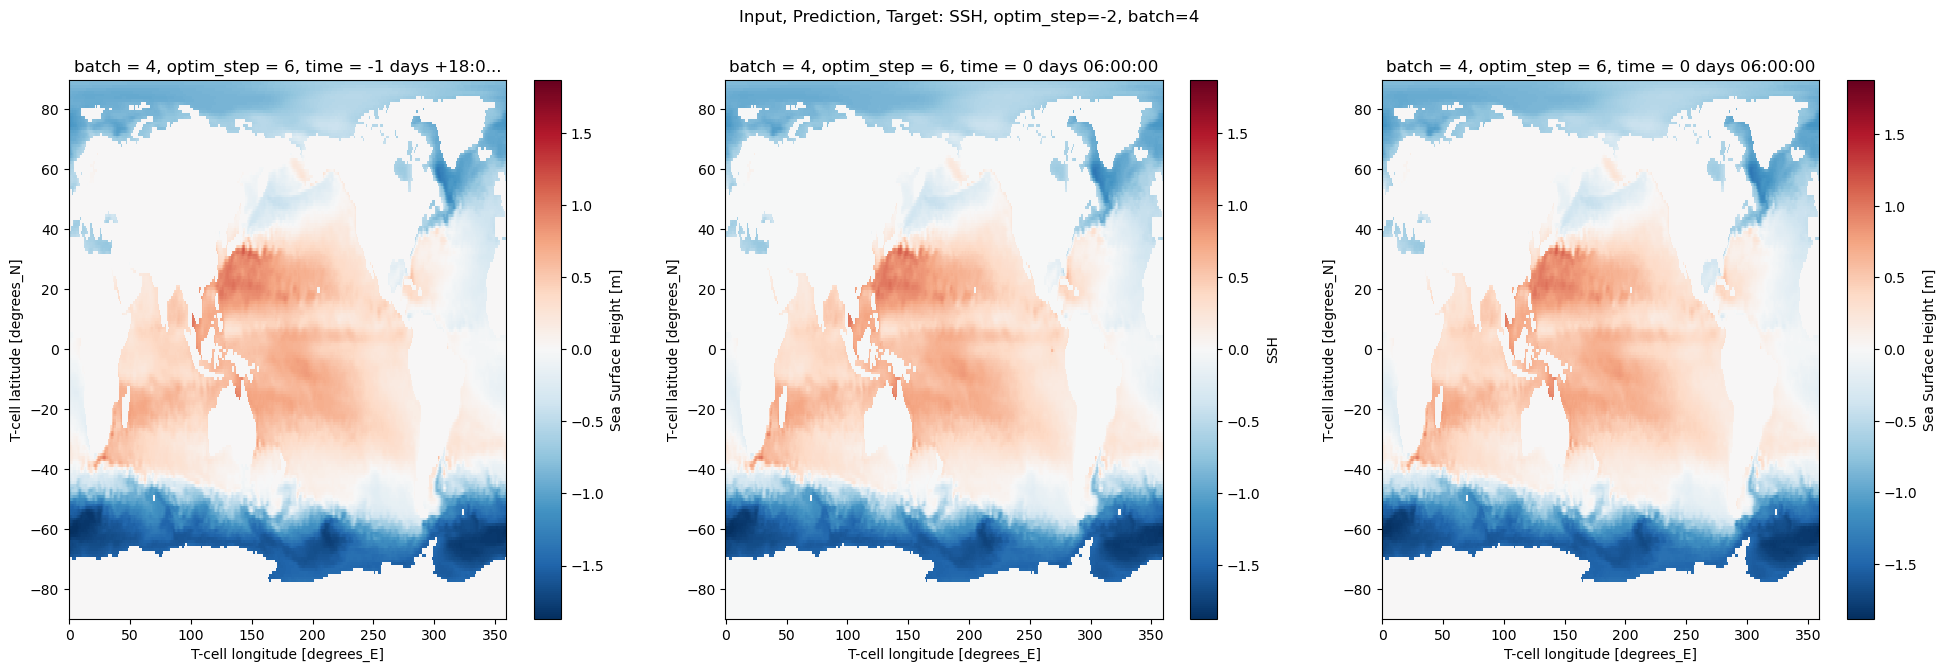

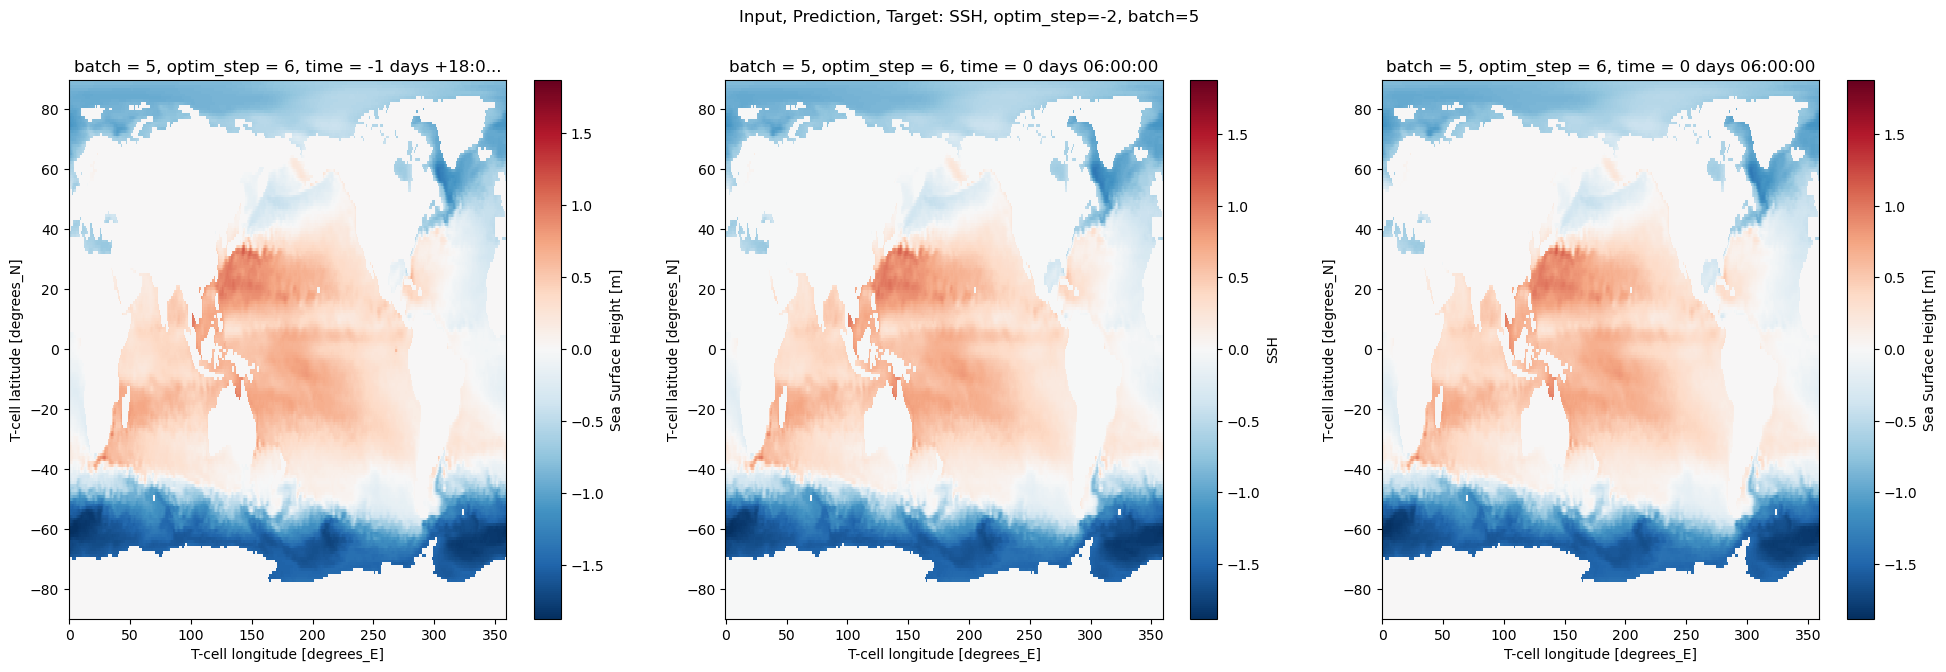

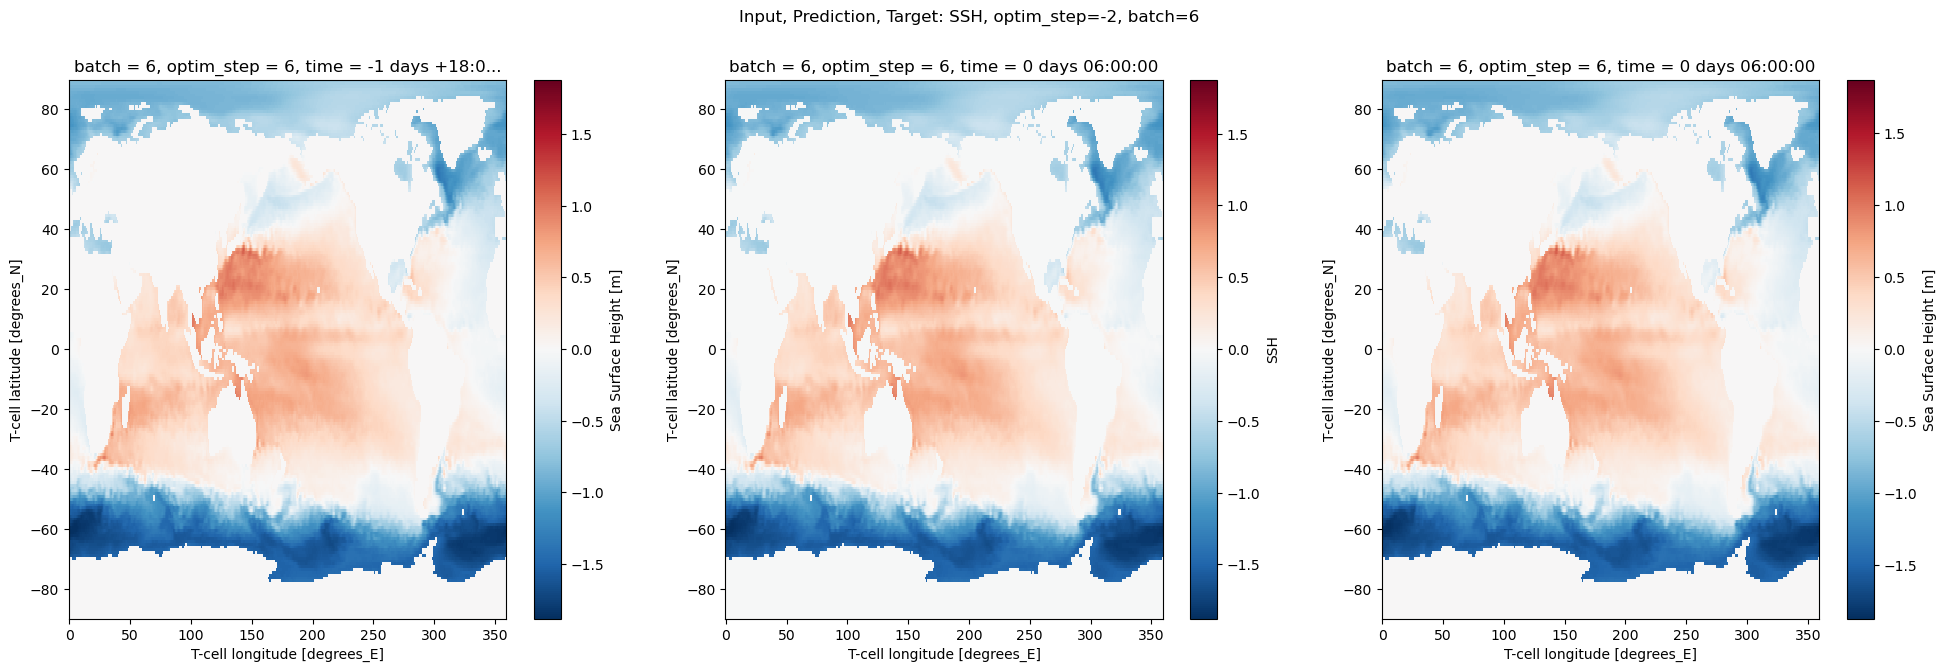

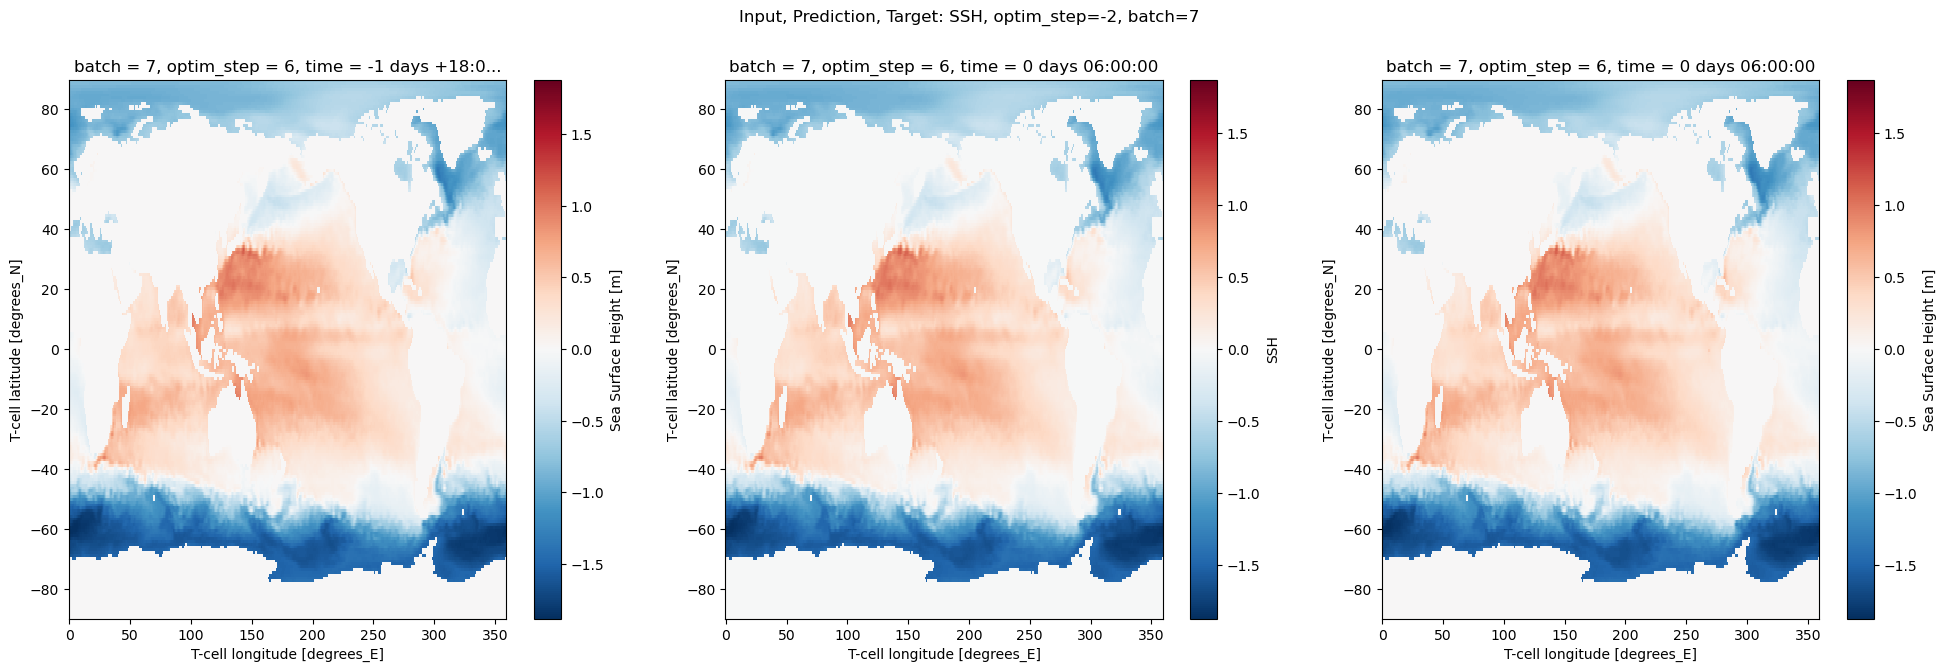

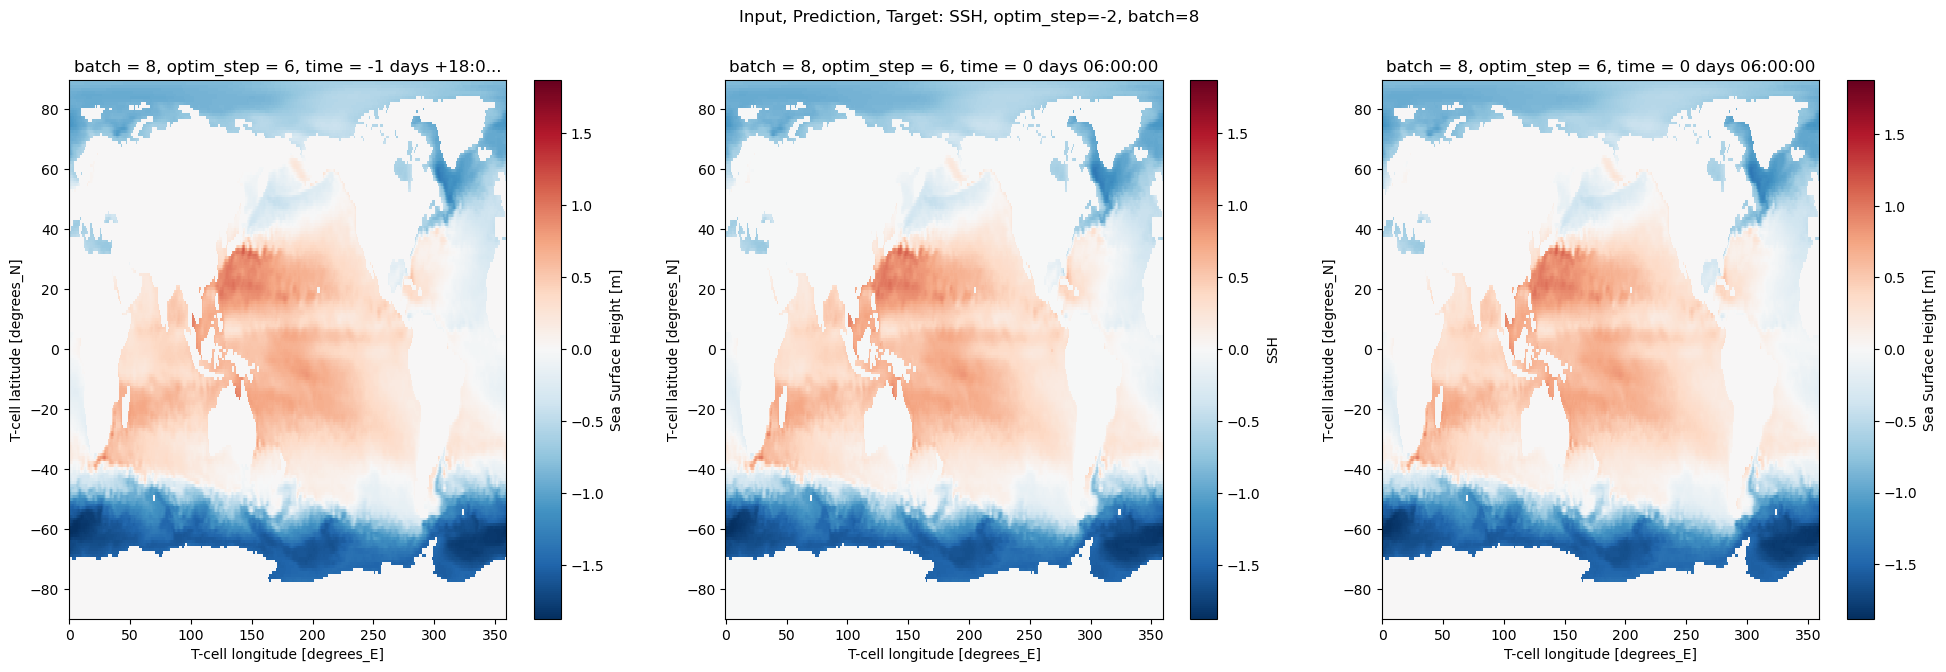

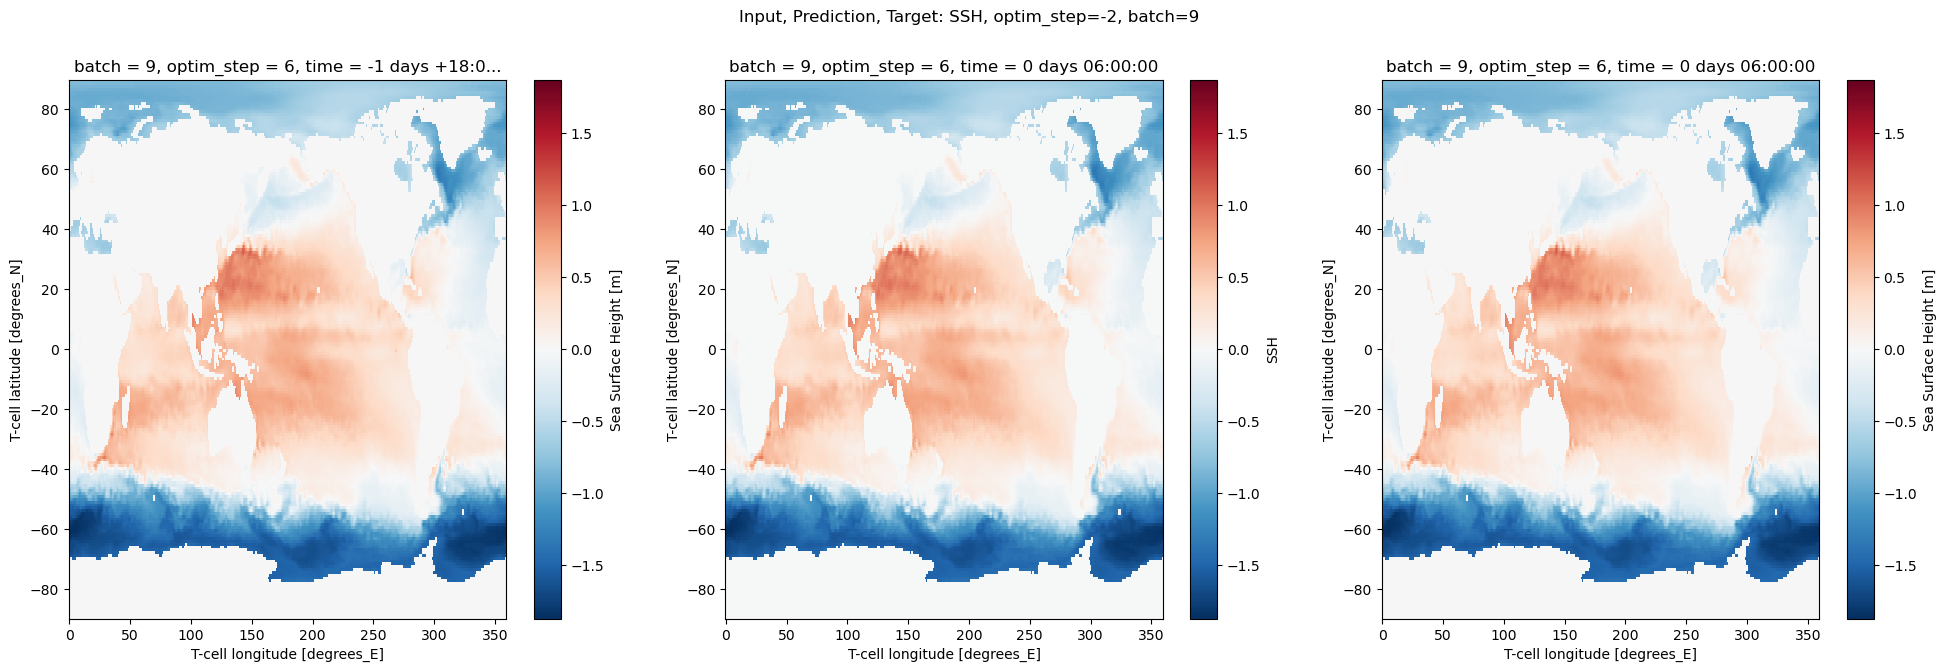

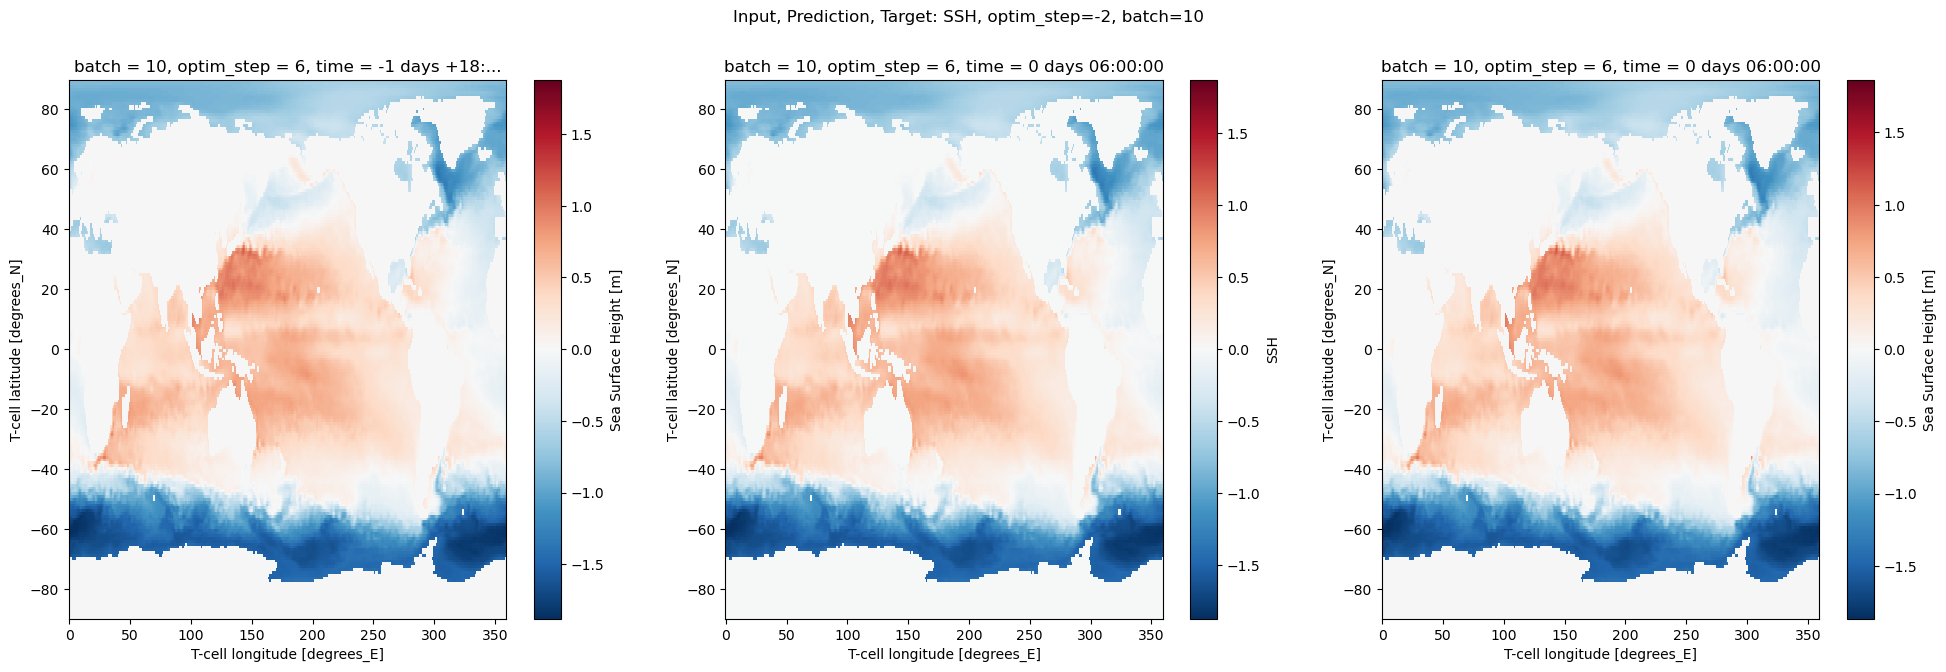

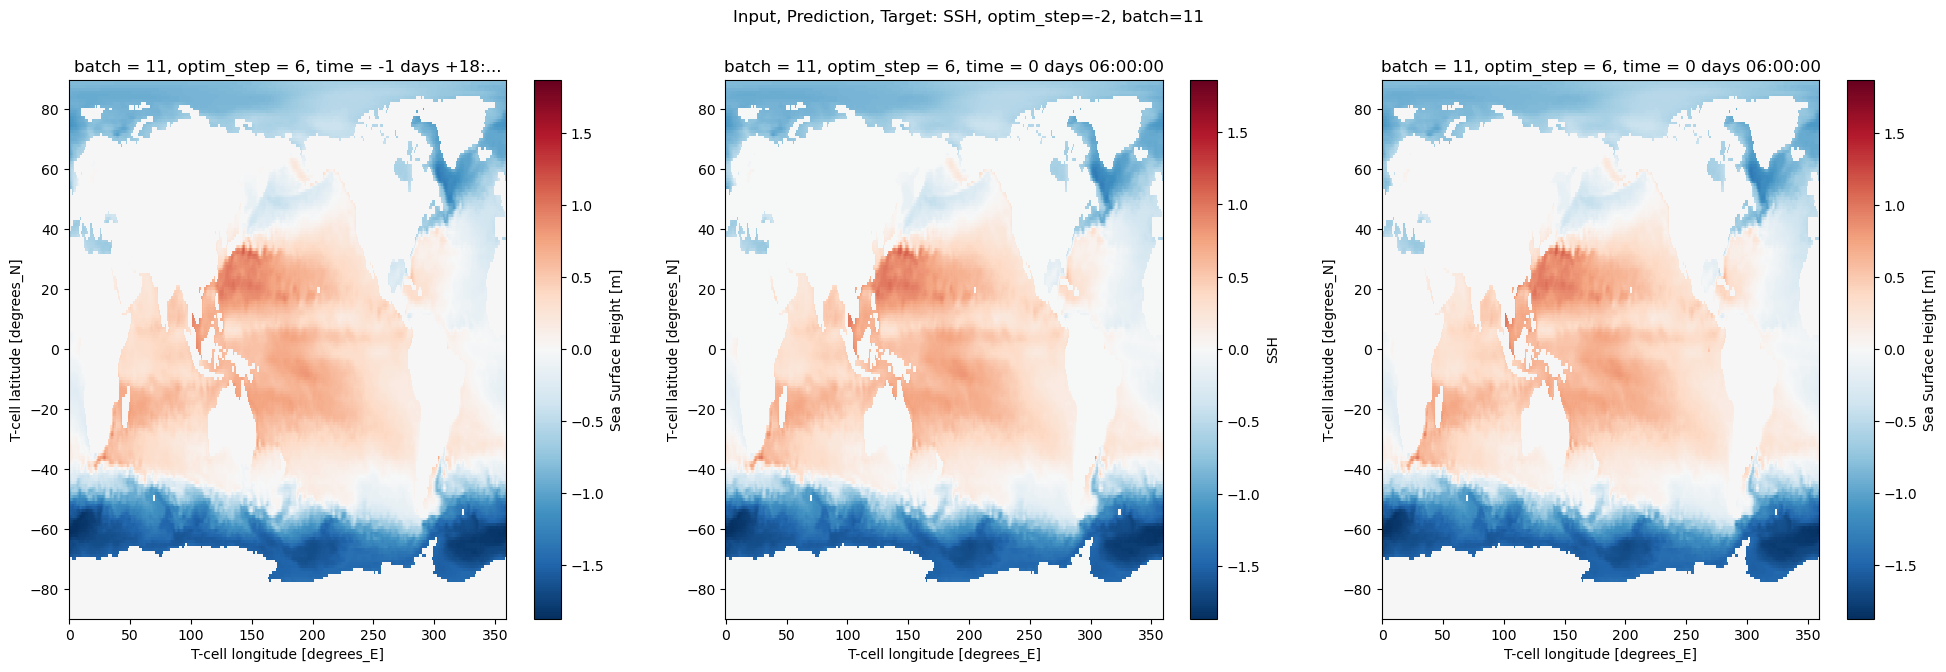

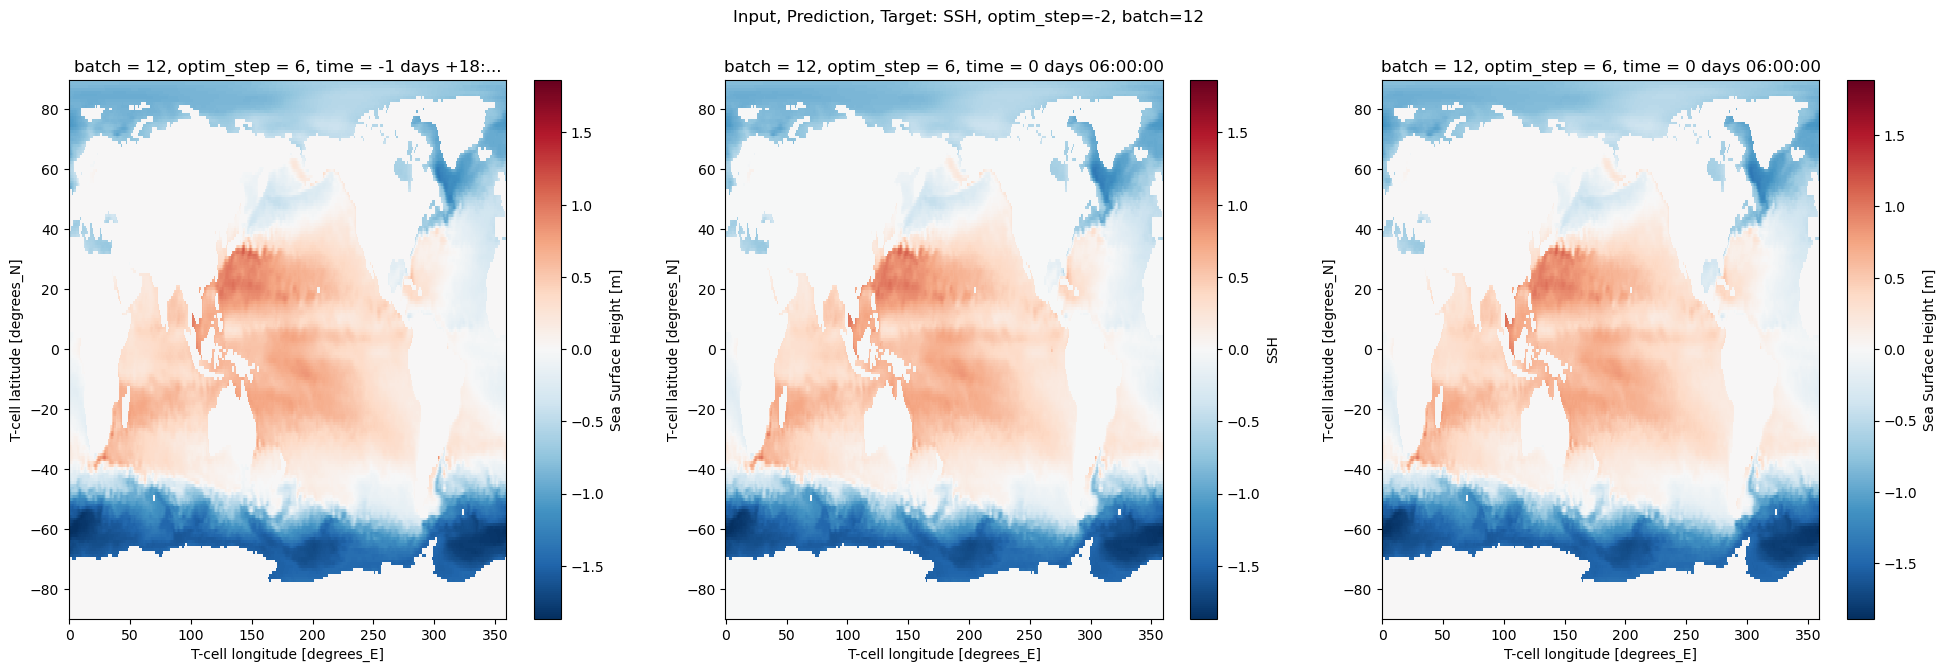

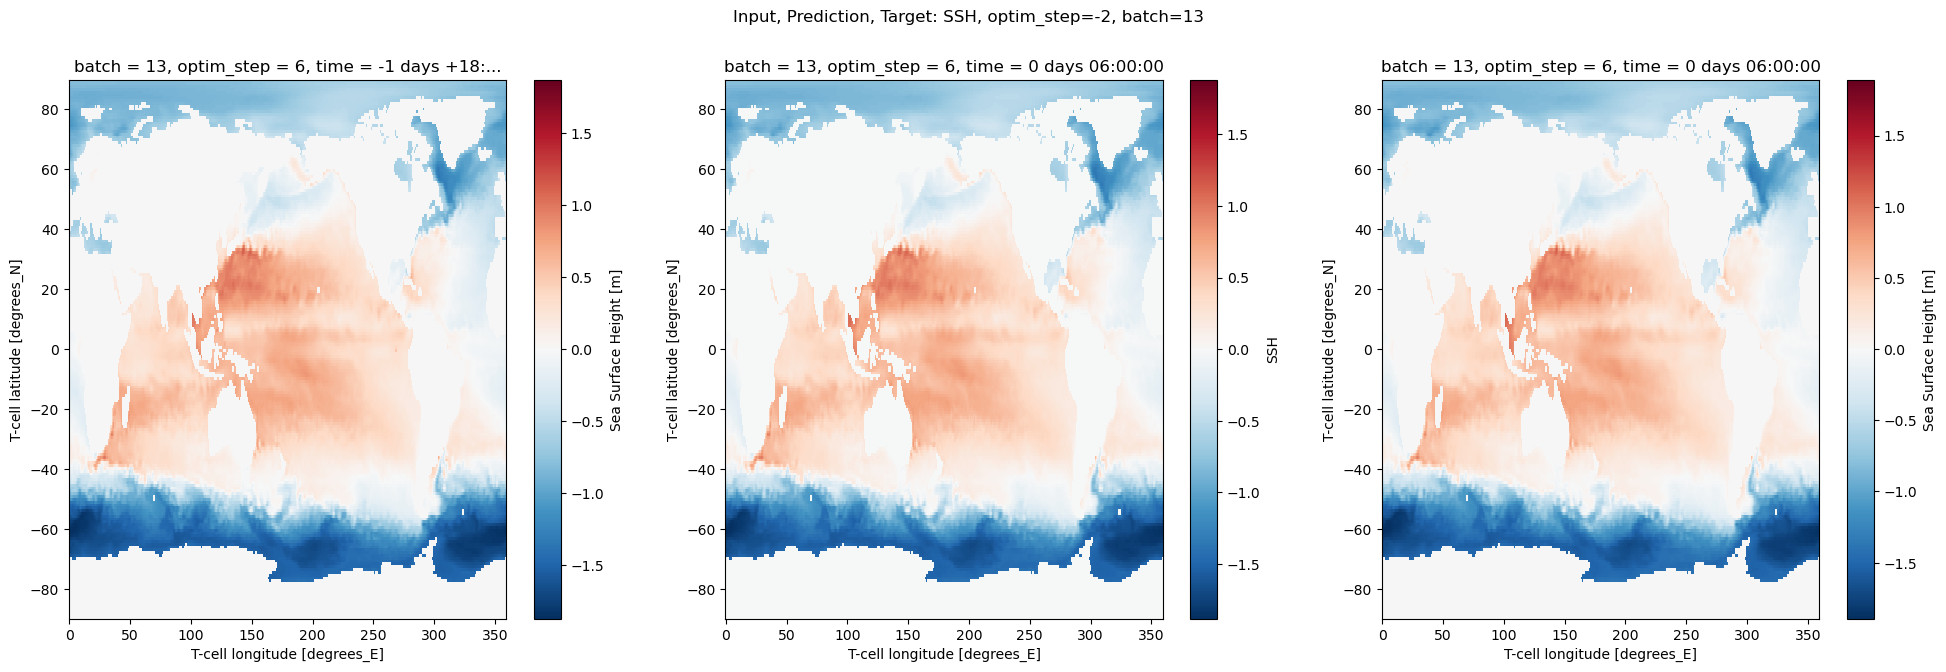

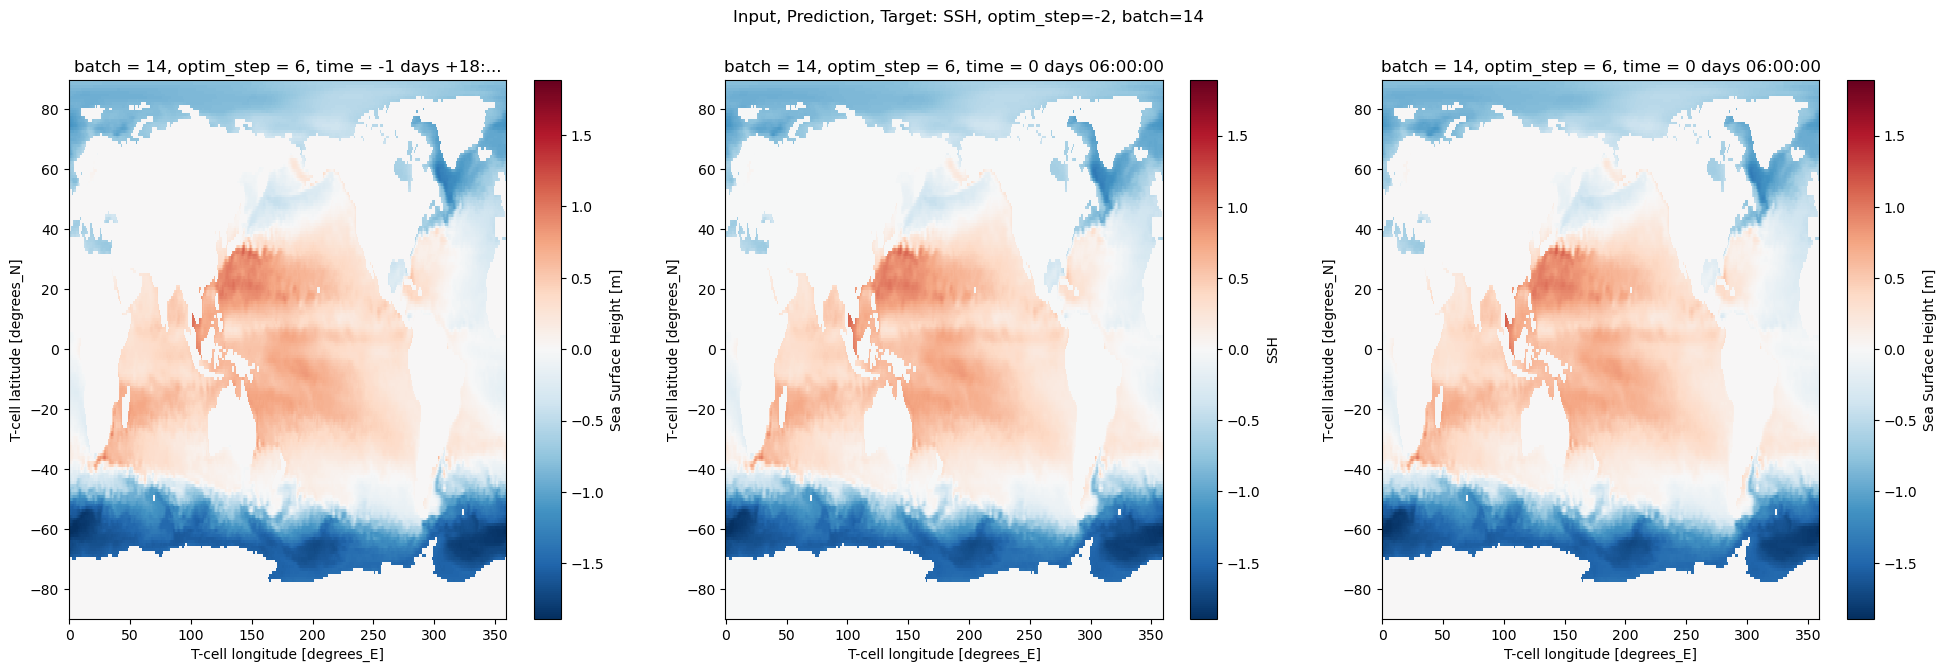

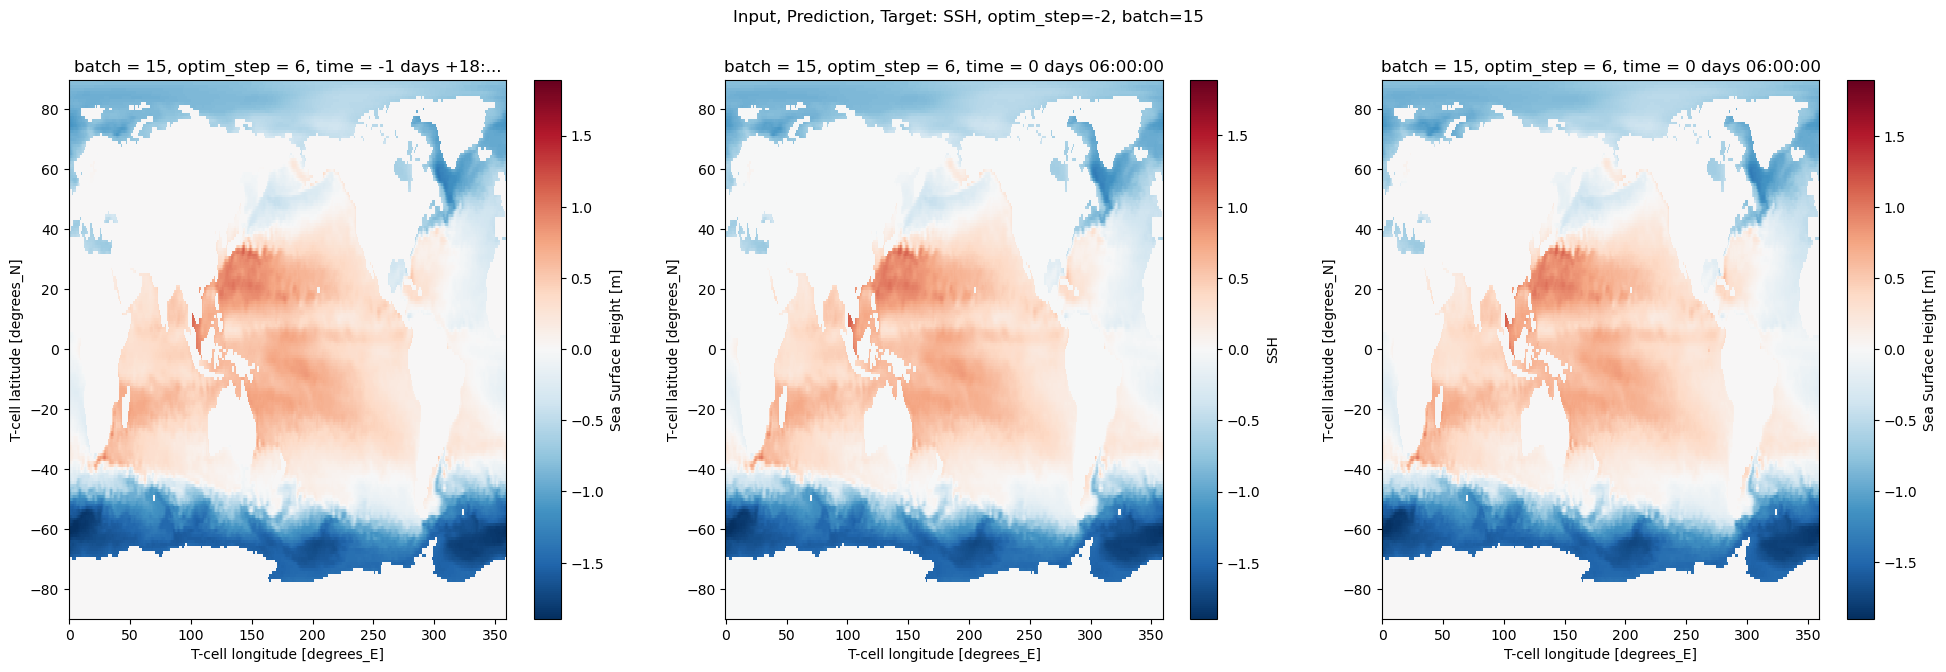

In [5]:
os = -2 # optimization step
for bnum in range(ds_pred.dims['batch']):
    fig, ax = plt.subplots(1, 3, figsize=(24,7))
    ds_inp.SSH.isel(time=0, batch=bnum, optim_step=os).plot(ax=ax[0])
    ds_pred.SSH.isel(time=0, batch=bnum, optim_step=os).plot(ax=ax[1])
    ds_tar.SSH.isel(time=0, batch=bnum, optim_step=os).plot(ax=ax[2])
    plt.suptitle(f'Input, Prediction, Target: SSH, optim_step={os}, batch={bnum}')
    plt.show()

In [6]:
# Prediction vs Target RMSE
err = ds_pred.SSH.isel(time=-1, batch=0, optim_step=-1).values - ds_tar.SSH.isel(time=-1, batch=0, optim_step=-1).values
print("RMSE Error:", np.sqrt(np.mean(err**2)))

RMSE Error: 0.016170247


In [7]:
# IC vs Prediction Difference
diff_tm1 = ds_inp.SSH.isel(time=0, batch=0, optim_step=-1).values - ds_pred.SSH.isel(time=-1, batch=0, optim_step=-1).values
print("RMSE Diff with IC (t-1):", np.sqrt(np.mean(diff_tm1**2)))

RMSE Diff with IC (t-1): 0.012974137


In [8]:
diff_t = ds_inp.SSH.isel(time=1, batch=0, optim_step=-1).values - ds_pred.SSH.isel(time=-1, batch=0, optim_step=-1).values
print("RMSE Diff with IC (t):", np.sqrt(np.mean(diff_t**2)))

RMSE Diff with IC (t): 0.0032711702


### Temp

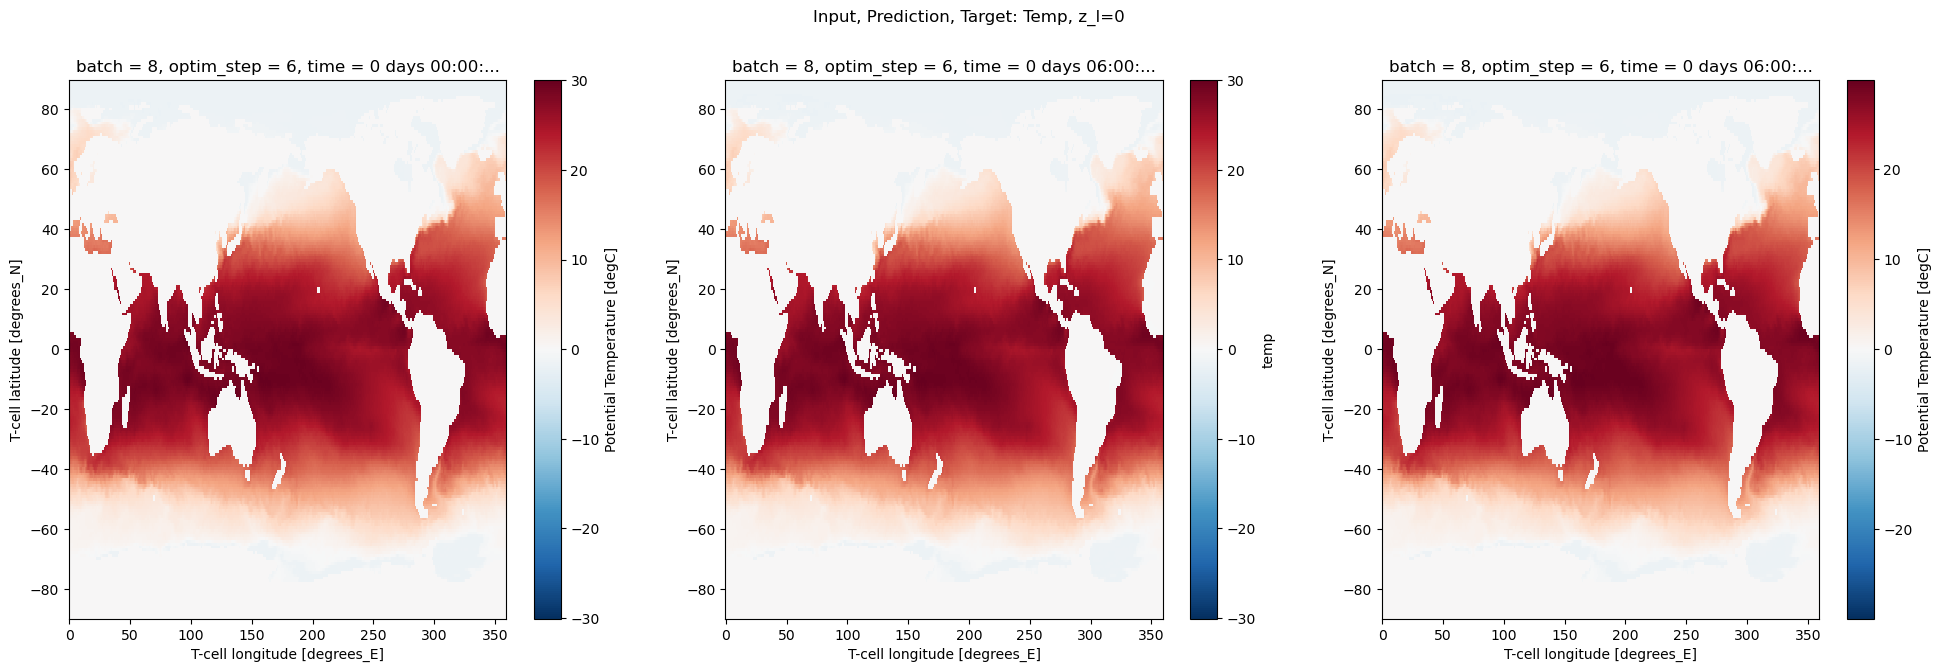

In [9]:
depth = 0
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest').plot(ax=ax[0])
ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest').plot(ax=ax[1])
ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest').plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Temp, z_l={depth}')
plt.show()

### Ice Concentration 

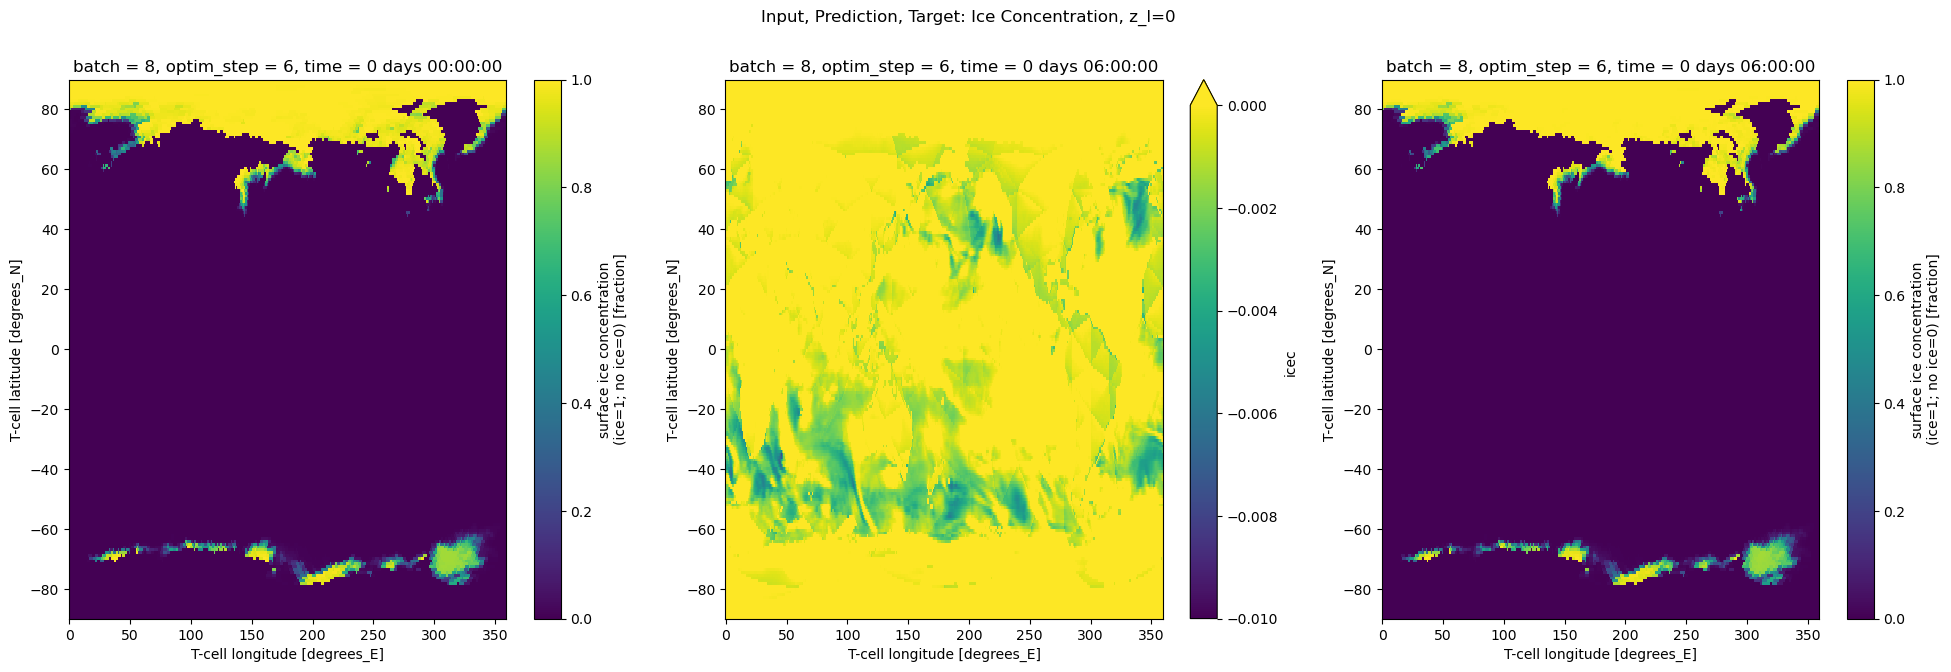

In [30]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.icec.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0])
ds_pred.icec.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], cmap='viridis', vmin=-0.01, vmax=0)
ds_tar.icec.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Ice Concentration')
plt.show()

### Ice Thickness

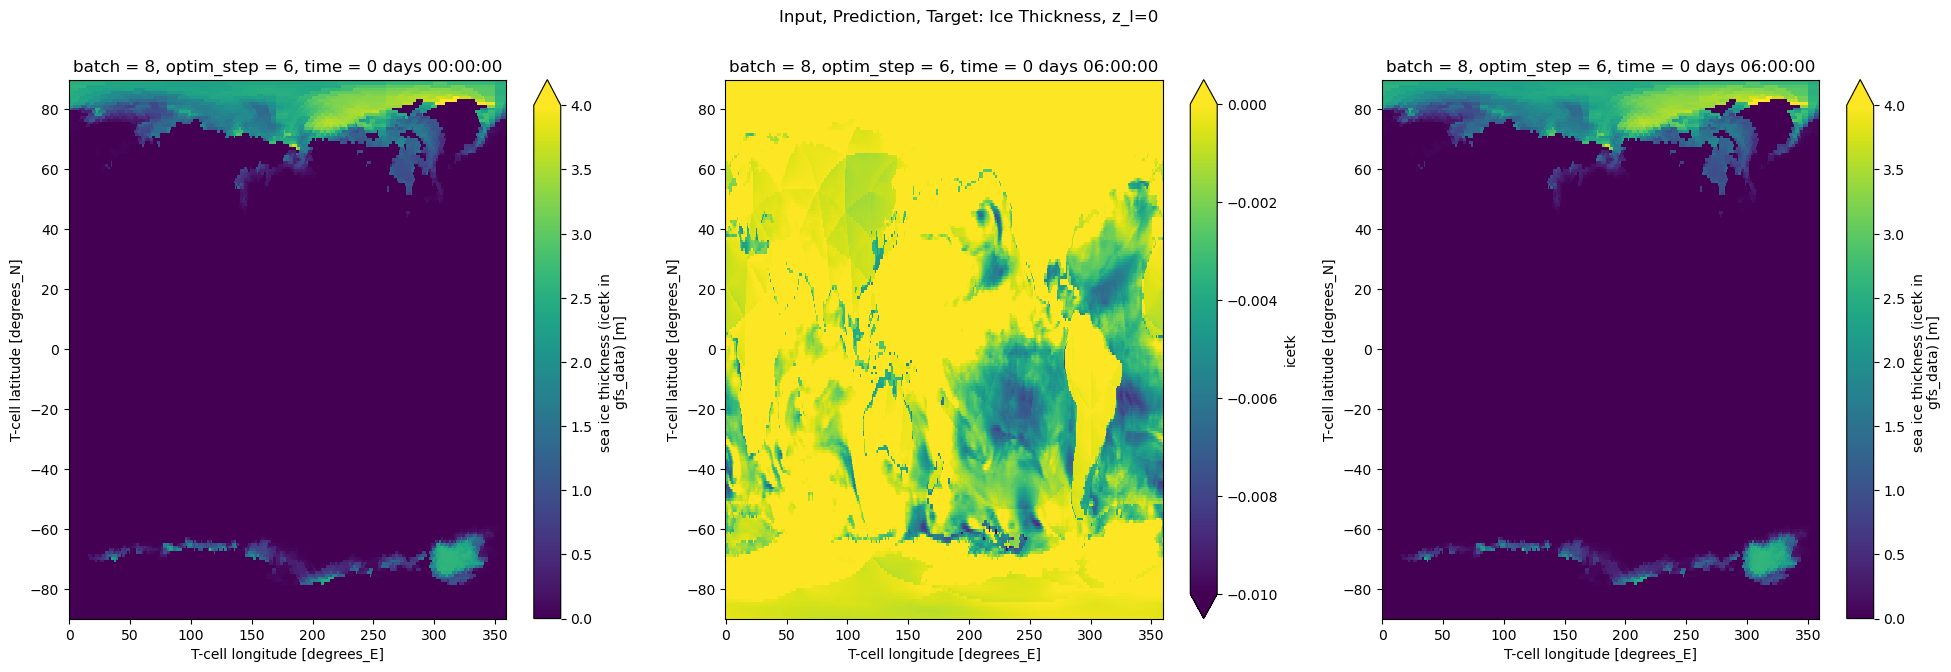

In [29]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.icetk.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0], vmin=0, vmax=4)
ds_pred.icetk.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], cmap='viridis', vmin=-0.01, vmax=0)
ds_tar.icetk.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2], vmin=0, vmax=4)
plt.suptitle(f'Input, Prediction, Target: Ice Thickness')
plt.show()

### Land Variable

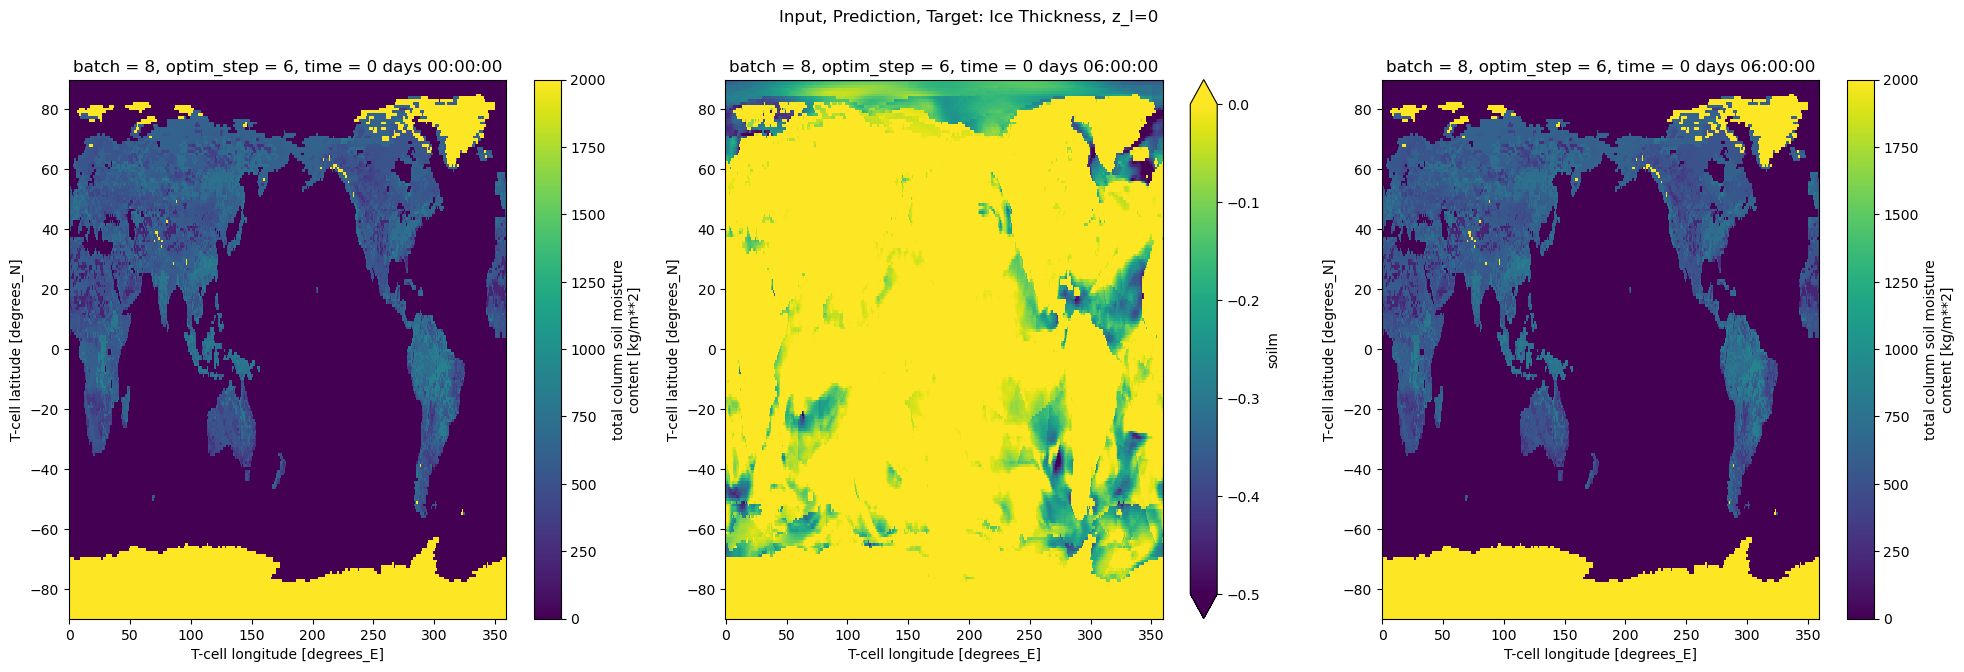

In [38]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.soilm.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0])
ds_pred.soilm.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], vmin=-0.5, vmax=0, cmap='viridis')
ds_tar.soilm.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Ice Thickness, z_l={depth}')
plt.show()

### Land mask

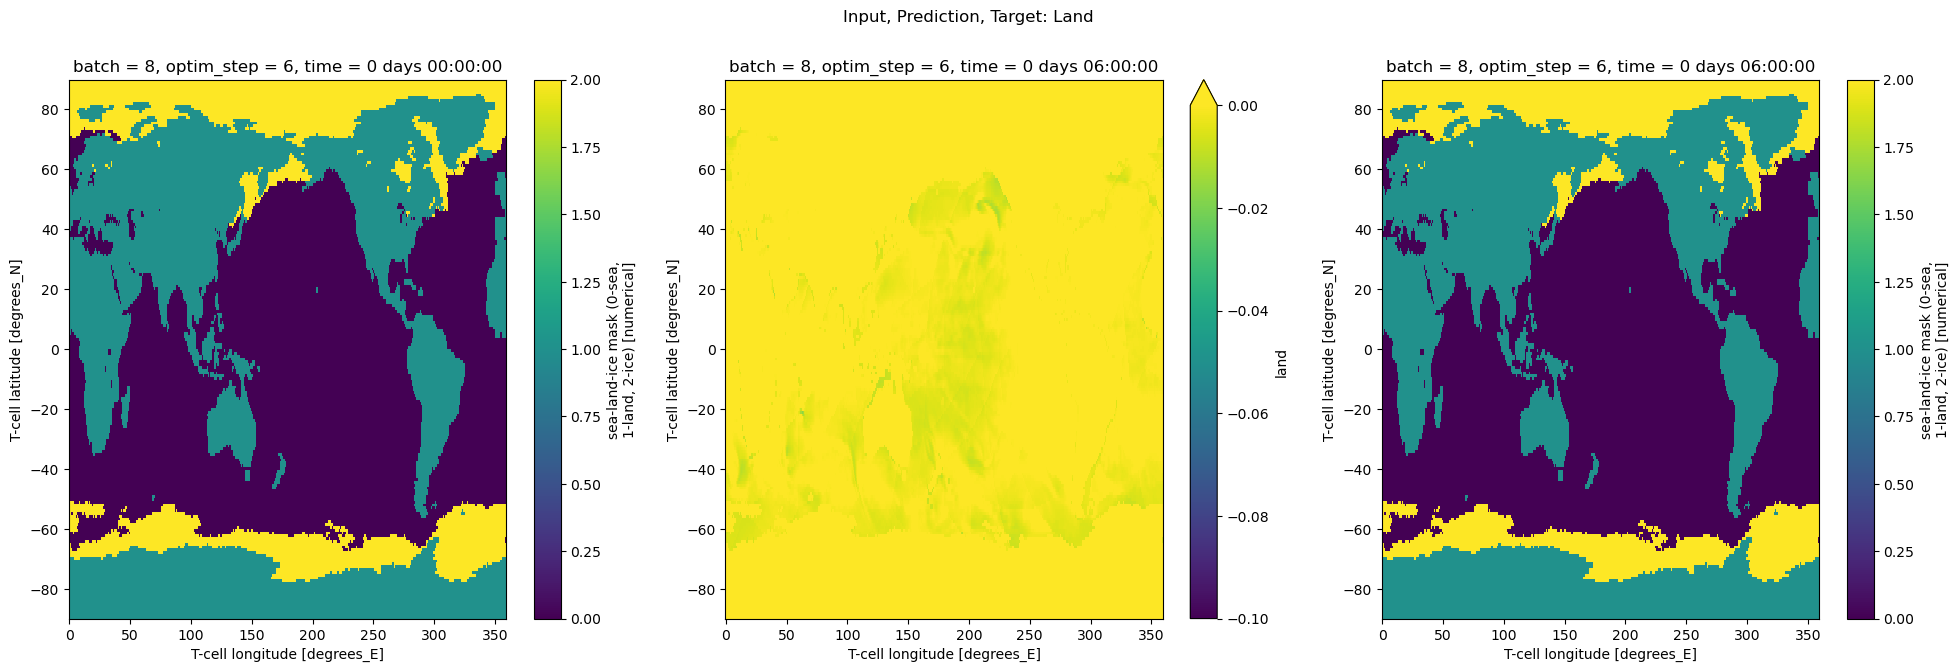

In [43]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.land.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0])
ds_pred.land.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], vmin=-0.1, vmax=0, cmap='viridis')
ds_tar.land.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Land')
plt.show()

### Local plots

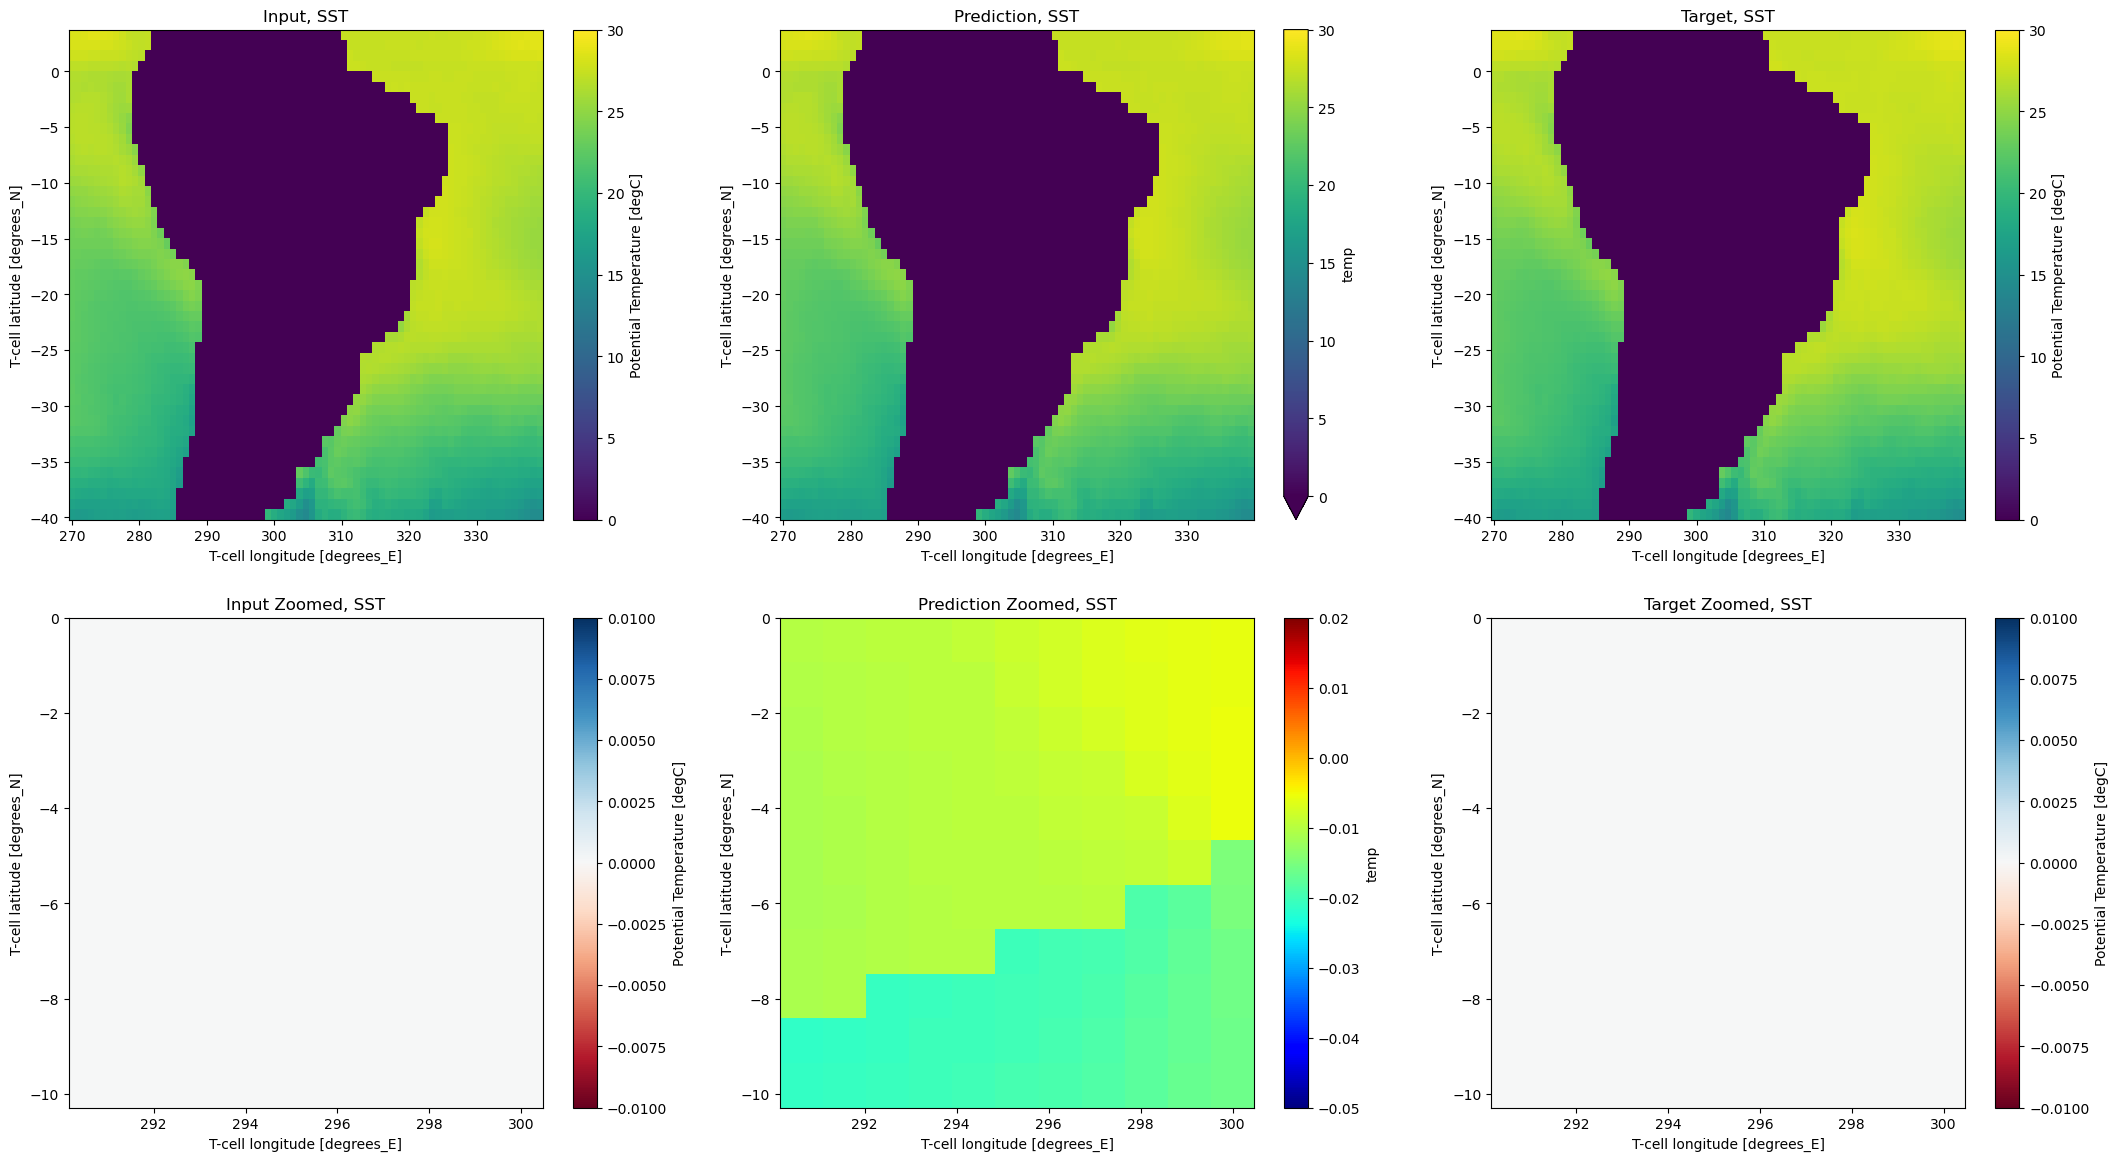

In [11]:
depth = 0 # Surface

fig, ax = plt.subplots(2, 3, figsize=(26,14))

# Input 
inp_temp = ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
inp_temp_zoom = ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
inp_temp.plot(ax=ax[0,0], vmin=0, vmax=30); ax[0,0].set_title("Input, SST")
inp_temp_zoom.plot(ax=ax[1,0], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,0].set_title("Input Zoomed, SST")

# Prediction
pred_temp = ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
pred_temp_zoom = ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
pred_temp.plot(ax=ax[0,1], vmin=0, vmax=30); ax[0,1].set_title("Prediction, SST")
pred_temp_zoom.plot(ax=ax[1,1], vmin=-0.05, vmax=0.02, cmap='jet'); ax[1,1].set_title("Prediction Zoomed, SST")

# Target
tar_temp = ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
tar_temp_zoom = ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
tar_temp.plot(ax=ax[0,2], vmin=0, vmax=30); ax[0,2].set_title("Target, SST")
tar_temp_zoom.plot(ax=ax[1,2], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,2].set_title("Target Zoomed, SST")
#plt.savefig("Input_Prediction_Target_SST_Local.png", dpi=300)
plt.show()

In [15]:
test_temp_inp = ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest')
test_temp_pred = ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest')
test_temp_tar = ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest') 
print(test_temp_pred)
print('Input test temp min:', abs(test_temp_inp).min())
print('Prediction test min:', abs(test_temp_pred).min())
print('Target test min:', abs(test_temp_tar).min())

<xarray.DataArray 'temp' (lat: 192, lon: 384)> Size: 295kB
array([[-1.761768  , -1.762455  , -1.7631172 , ..., -1.7596473 ,
        -1.7602897 , -1.7610434 ],
       [-1.773012  , -1.7733948 , -1.7742862 , ..., -1.7713959 ,
        -1.7720959 , -1.7725784 ],
       [-1.8078047 , -1.8083683 , -1.8086207 , ..., -1.8054869 ,
        -1.8063776 , -1.8071597 ],
       ...,
       [ 0.01114177,  0.01025755,  0.009415  , ...,  0.01335217,
         0.01295521,  0.0119038 ],
       [ 0.00807105,  0.00724061,  0.00677618, ...,  0.01011006,
         0.00892909,  0.00862369],
       [ 0.00454476,  0.00431115,  0.00349934, ...,  0.00590499,
         0.00536651,  0.00509577]], dtype=float32)
Coordinates:
    batch       int64 8B 8
  * lat         (lat) float64 2kB 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * lon         (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    optim_step  int64 8B 90
    time        timedelta64[ns] 8B 06:00:00
    z_l         float64 8B 0.5154
Input test 

### Check Land Mask

In [44]:
# Check the land mask across predictions
model_landsea_mask = xr.where(np.abs(test_pred)<2e-1, 0, 1)
#var_mask = model_landsea_mask.std(dim=('optim_step', 'batch', 'time'))

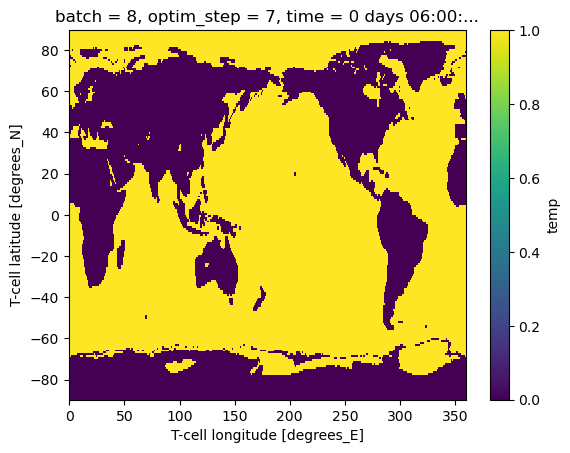

In [45]:
model_landsea_mask.plot()
plt.show()

In [39]:
ds_pred.temp.isel(optim_step=-4, batch=-1, time=-1, z_l=0).values

array([[-1.7354606 , -1.7358818 , -1.7362854 , ..., -1.7340778 ,
        -1.7344806 , -1.7349753 ],
       [-1.7464017 , -1.7465469 , -1.7472506 , ..., -1.7456092 ,
        -1.7460506 , -1.7462385 ],
       [-1.7811296 , -1.7814169 , -1.7813601 , ..., -1.7794935 ,
        -1.7802184 , -1.7807326 ],
       ...,
       [-0.09414664, -0.09410944, -0.09415487, ..., -0.09409332,
        -0.09396231, -0.09409117],
       [-0.09569908, -0.0957248 , -0.09562657, ..., -0.09605173,
        -0.09598748, -0.09582905],
       [-0.09674213, -0.0965426 , -0.09646039, ..., -0.09732579,
        -0.09712058, -0.09679421]], dtype=float32)

In [40]:
ds_mom6 = xr.open_zarr("gs://noaa-ufs-gefsv13replay/ufs-hr1/1.00-degree/06h-freq/zarr/mom6.zarr", storage_options={'token':'anon'})
landsea_mask_ref = ds_mom6.landsea_mask

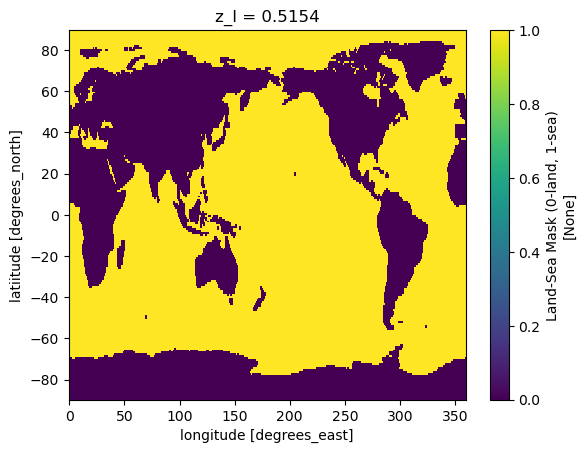

In [41]:
landsea_mask_ref.isel(z_l=0).plot()
plt.show()

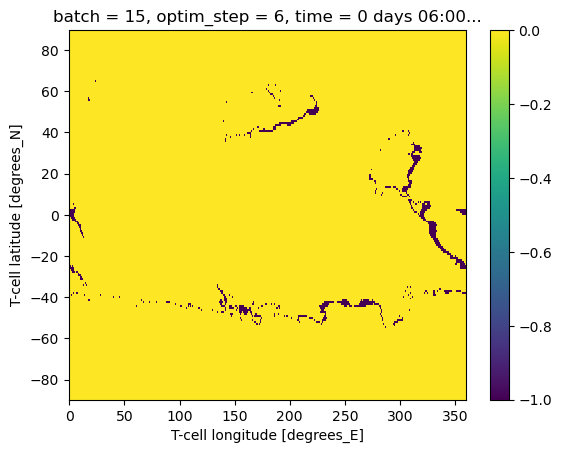

In [43]:
mask_diff = model_landsea_mask.isel(optim_step=-1, batch=-1, time=-1) - landsea_mask_ref.isel(z_l=0)
mask_diff.plot()
plt.show()

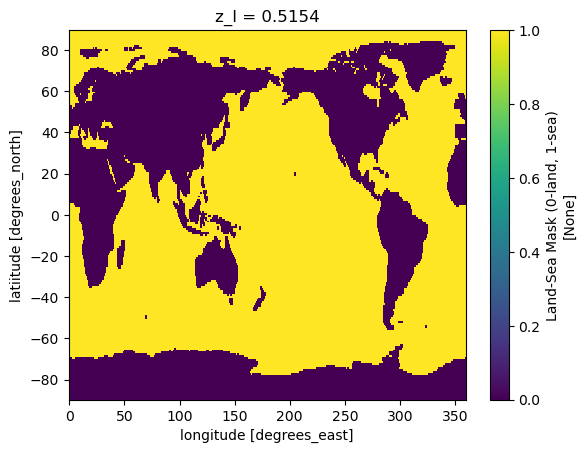

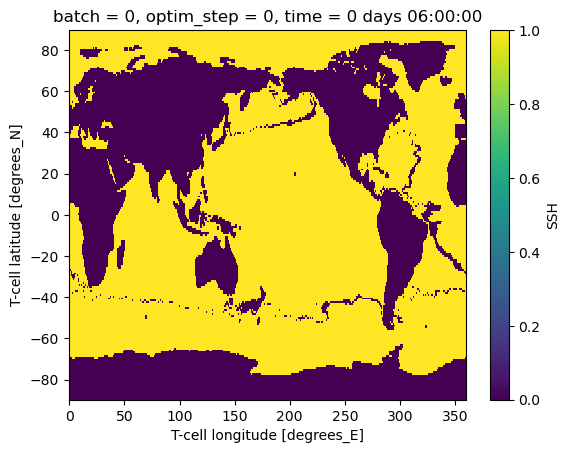

In [44]:
landsea_mask_ref.isel(z_l=0).plot()
plt.show()
model_landsea_mask.isel(optim_step=0, batch=0, time=0).plot()
plt.show()

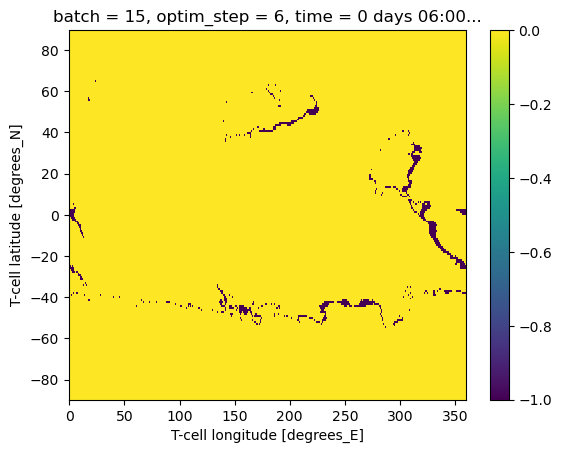

In [45]:
mask_diff.plot()

### Thinking about layer weights

In [5]:
z_l_recipro = 1./ds_pred.z_l
arimean =  ds_pred.z_l.mean()
harmean = 1/z_l_recipro.mean()
print('Arithmetic mean:', arimean)
print('Harmonic mean:', harmean)

weights_ari = ds_pred.z_l/arimean
weights_har = z_l_recipro/harmean

print('Arithmethic weights:', weights_ari)
print('Harmonic weights:', weights_har)

Arithmetic mean: <xarray.DataArray 'z_l' ()> Size: 8B
array(82.73226198)
Harmonic mean: <xarray.DataArray 'z_l' ()> Size: 8B
array(1.52568355)
Arithmethic weights: <xarray.DataArray 'z_l' (z_l: 3)> Size: 24B
array([0.00622978, 0.57249263, 2.42127759])
Coordinates:
  * z_l      (z_l) float64 24B 0.5154 47.36 200.3
Harmonic weights: <xarray.DataArray 'z_l' (z_l: 3)> Size: 24B
array([1.27170961, 0.01383855, 0.00327202])
Coordinates:
  * z_l      (z_l) float64 24B 0.5154 47.36 200.3
